# <div align="center" style="color:red"> Lending Club Case Study <div>

# Problem Statement:

### You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

### 1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

### 2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

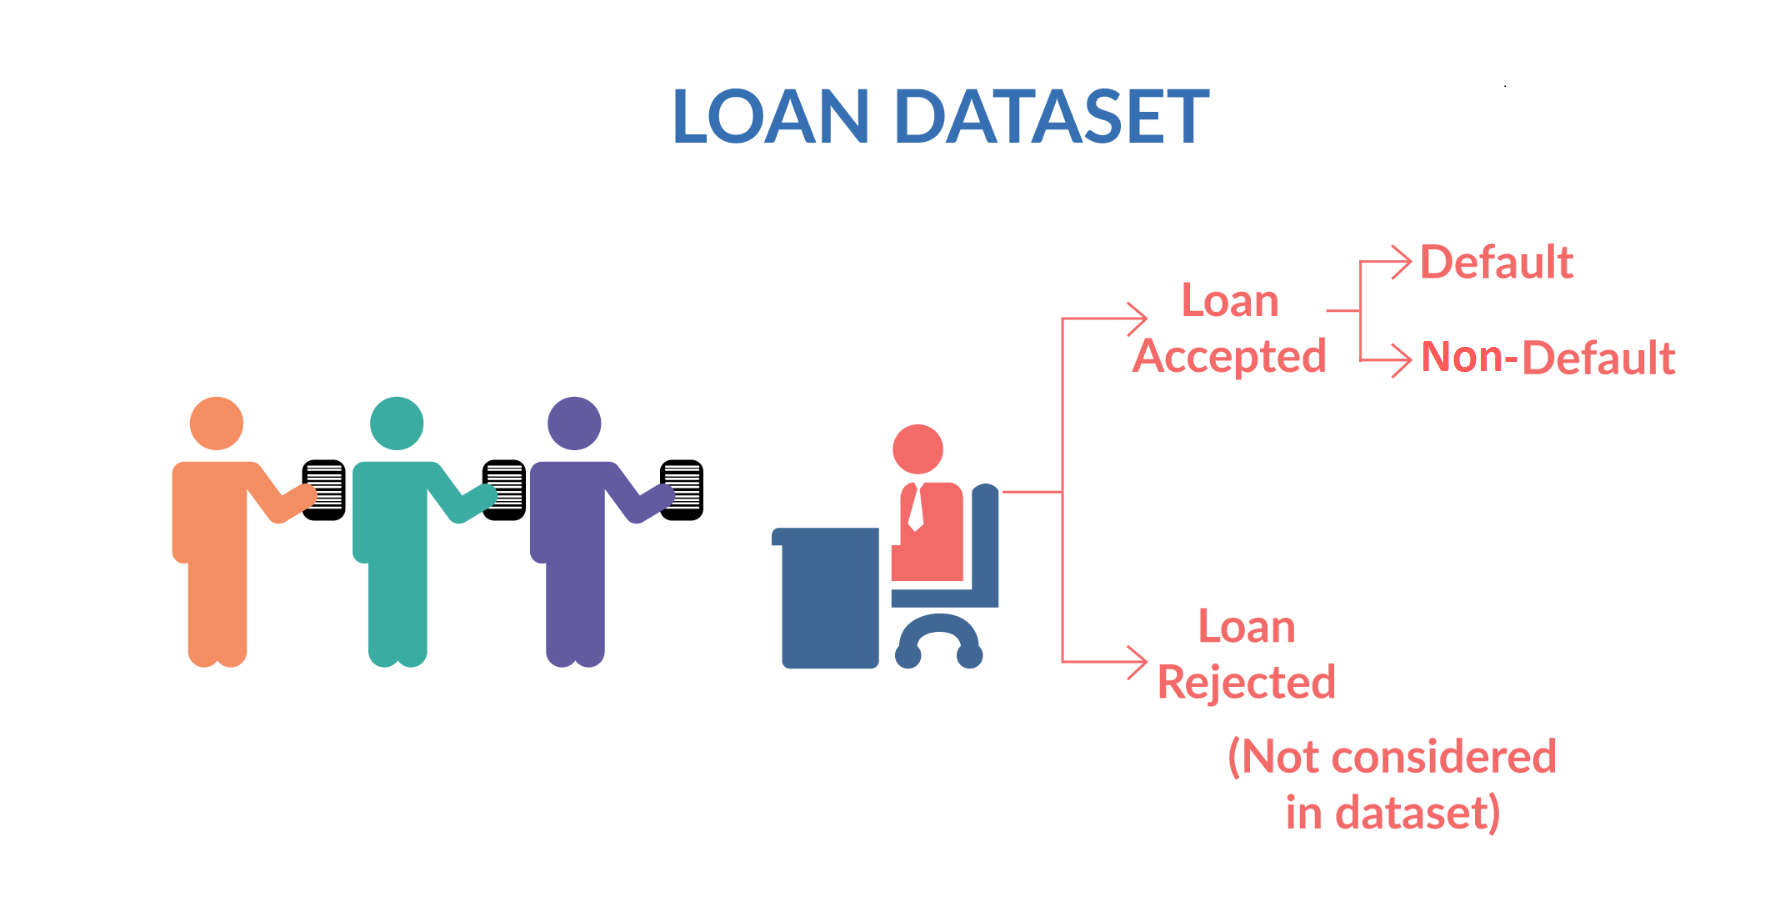

## Contents of Notebook

> 1. Data Understanding : 
>>Target Variable is Loan Status Feature

>2. Data CleanUp:
>>Analyzed the Rows with lost of missing values , Rows with single Unique Values, Duplicate Rows, Highly Correlated Features

>3.Feature Extraction:
>>Based on Type Driven, Data Driven, Busines Driven

>4.Imputation & Outlier Treatment

>5.Encoding of Categorical Features

>6.Utility Functions:
>>plotMissingColumns(data) ,uniqueVsMissingDataMapping(data),convertToYear(x):, convertToMonth(x):, convertFeatureToDateTime(data, colName, colPrefix) , showchargedoffpropation(data,col),segmentedUnivariateAnalysis(data,col)

>7.Univariate / Segmented / Bivariate Analysis of Features


# <span style="color:red"> Note: Color Coding used in NoteBook </span>

>header has different color based on :

<table>
    <tr>
        <th>Purpose</th>
        <th>Color</th>
    </tr>
    <tr>
        <th>Section Division</th>
        <th style="background-color: coral"></th>
    <tr> 
    <tr>
        <th>High Relevant Features</th>
        <th style="background-color: green"></th>
    <tr> 
    <tr>
        <th>Low Relevant Features</th>
        <th style="background-color: yellow"></th>
    <tr> 
    <tr>
        <th>No Relevance Features</th>
        <th style="background-color: red"></th>
    <tr> 
    
</table>

### <div style="background-color: coral;font-size: 30px;">Part 1 : Data understanding</div>

In [1]:
# import python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Remove waringns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load DataSet : Keep the csv data file in same folder location
data = pd.read_csv("loan.csv")

In [4]:
# Print first few columns
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

# <div style="color:red"> Target Feature For Analysis </div>

> Based on the dataset for Analysis we have the 

><b>1.Target Variable as Loan Status where</b> 
>> <b>a. Charged off </b>: means loan is default one and customer has not paying the Loan amount back to the Firm.
>><br><b> b. Fully Paid :</b> the Loan has been successfully closed and borrower has returned all money ( Principal + Interest) back to Firm.
>> <br> c. Current : Still Borrower is returning back to firm & its still not completed and its a ongoing when the data has been caputured. <span style="color:red"> We will drop it off as it won't help in analysis of Loan defaulter <span>


In [5]:
# Now lets analyse all the data columns and do the Data Cleanup

# <div style="color:red"> Data Cleaning & Manipulation </div>

In [6]:
# shape of data
df_shape = data.shape

print('Rows of Dataset : ',df_shape[0])
print('Columns of Dataset : ',df_shape[1])

Rows of Dataset :  39717
Columns of Dataset :  111


## 1. Check Missing Values in Dataset

#### Function Created For Ploting Missing Data

In [7]:
# Functions to plot 
def plotMissingColumns(data):
    #check no of missing data in each columns
    df_missing = data.isnull().sum()

    #plot this interpretaton
    plt.figure(figsize=(18,8))
    sns.barplot(x=df_missing.index,y=df_missing.values,color="salmon")
    plt.grid("on")
    plt.xticks(rotation=90)
    plt.title("Missing data in Each Features")
    plt.show()

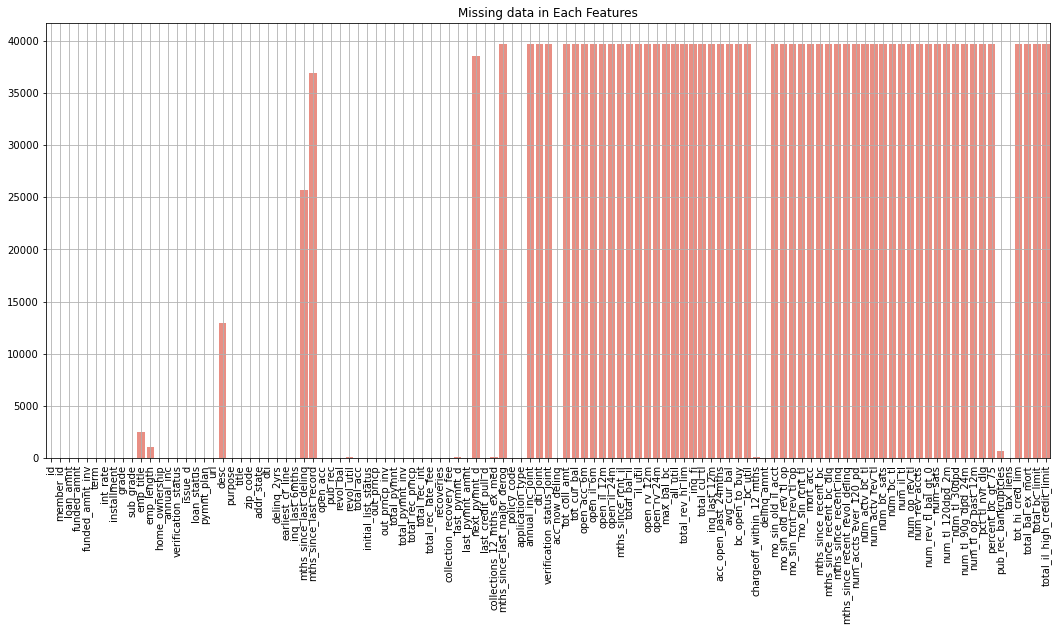

In [8]:
#plot missing Data
plotMissingColumns(data)

###### <span style="color:blue"> Observation : There are lots of Missing Data in Dataset </span>

#### 1.Drop the Column which has all <span style="color:red"> more than 50% columns values as missing. </span>

In [9]:
x_val = df_shape[0]*0.50

print('Columns having ', x_val, ' null values needs to be dropped, as with these many null values columns cant contribute to Analysis' )

Columns having  19858.5  null values needs to be dropped, as with these many null values columns cant contribute to Analysis


In [10]:
df_missing = data.isnull().sum()
dropColumnList = list(df_missing[df_missing>x_val].index)
print('No. of columns having more than 50% Missing Values : ',len(dropColumnList))
print()
print('List of Columns to be dropped: ',dropColumnList)

No. of columns having more than 50% Missing Values :  57

List of Columns to be dropped:  ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num

In [11]:
#drop columns
data.drop(dropColumnList, axis = 1, inplace= True)

In [12]:
df_shape = data.shape
print('Dataset Shape after columns drop : ',df_shape)

Dataset Shape after columns drop :  (39717, 54)


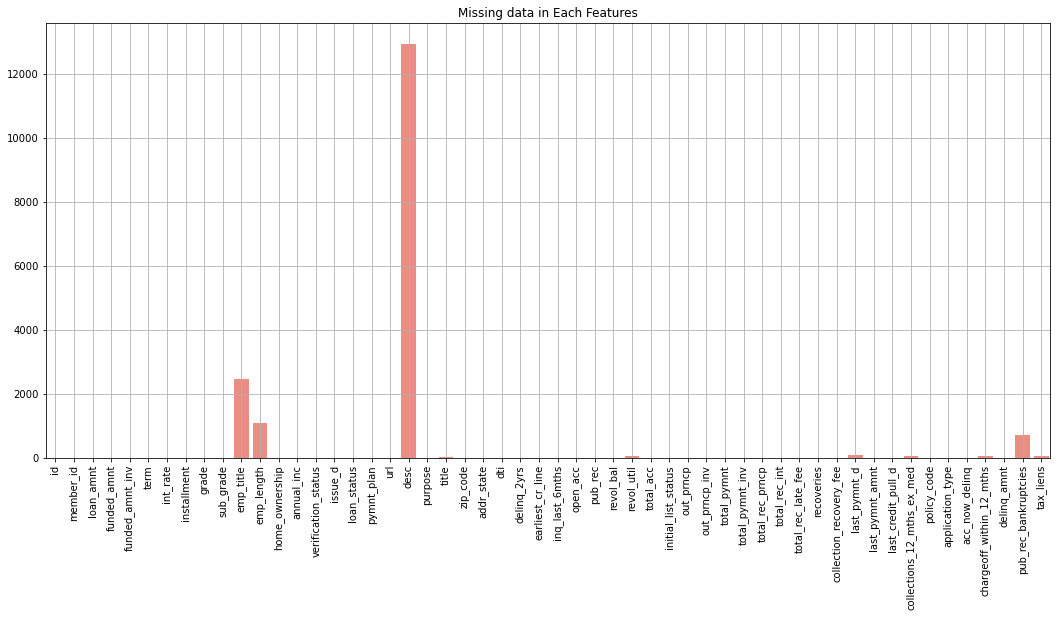

In [13]:
# Lets visualize again the missing data
plotMissingColumns(data)

###### <span style="color:blue">Now we left with only few Features which is having Missing Values </span>

#### 2. Lets analyse the Duplicate Columns header

In [14]:
duplicateColHeader = data.columns.duplicated()
duplicateColHeader[duplicateColHeader == True] 

array([], dtype=bool)

In [15]:
#Observation : there is no column header that is duplicated so no need to further analyse based on this

#### 3. Lets analyse Based on Duplicate Rows

In [16]:
data[data.duplicated()==True]

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []

[0 rows x 54 columns]

In [17]:
#There is no rows that has duplicate values so no need to do furhter analysis based on this

#### 4. Lets analyse the unique values in each Columns

In [18]:
#extract data columns
df_columns = data.columns

##### Function Created For Ploting Unique Vs Missing Data

In [19]:
#Function
def uniqueVsMissingDataMapping(data):
    df_missing = data.isnull().sum()
    #unique values in each columns
    df_unique = data.nunique()

    #merge two series in dataframe
    d_dict = {"missing":df_missing,"unique":df_unique}
    df_missing_unique = pd.concat(d_dict,axis=1)

    fig = plt.figure(figsize=(18,8))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    df_missing_unique['missing'].plot(kind='bar',color='blue',ax=ax1,position=1)
    df_missing_unique['unique'].plot(kind='bar',color='green',ax=ax2,position=2)
    plt.ylim(reversed(plt.ylim()))
    plt.grid("on")
    plt.legend()
    plt.title("Unique VS Missing Data Information For Each Features")
    plt.xticks(rotation=90)
    plt.show()
    return df_missing_unique

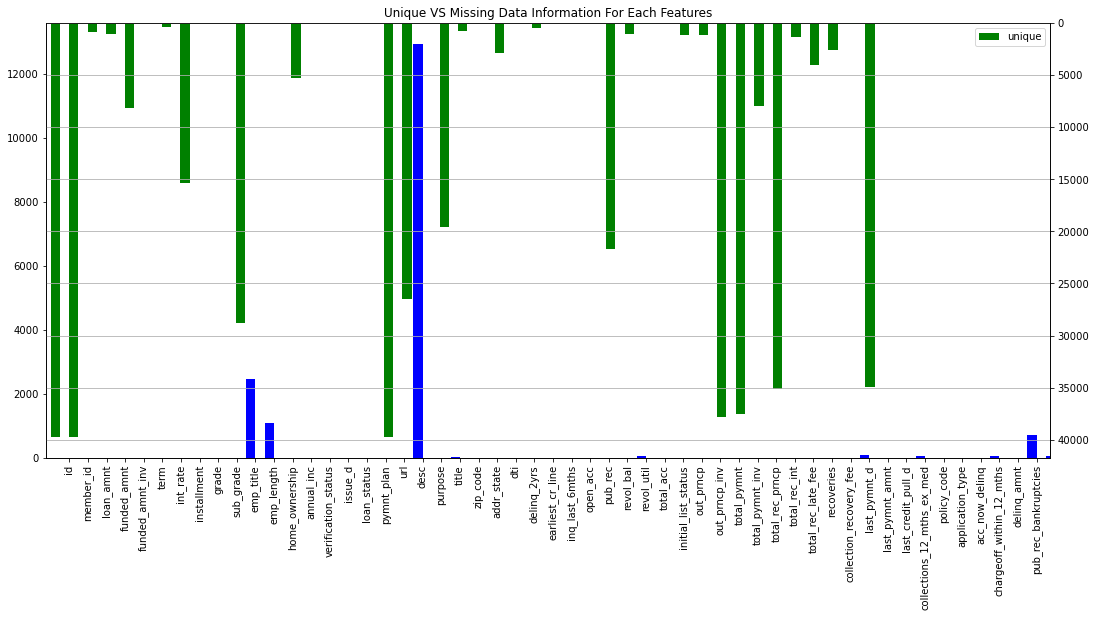

In [20]:
#Unique vs Missing
df_missing_unique = uniqueVsMissingDataMapping(data)

###### <span style="color:blue">Observation </span>

>###### 1.Green Line touching bottoms :              There are some features whose unique count reaches to total no. of rows so with every column value as a unique value won't contribute to the any relation ship with other features 

>###### 2.Blue Line intersecting with Green Lines :   There is one feature desc whose missing value and unique count overlap so potential candidate to observe that do we need column r drop it

>###### 3.Green Lines  at top :                       There are some feature whose unique value is 1 , so it will have constant relation with all features in all rowso may be we can drop this.



#### a. Unique Count equals to Row Count : Drop Features

In [21]:
d = df_missing_unique[df_missing_unique['unique'] == df_shape[0]]
d

missing  unique
id               0   39717
member_id        0   39717
url              0   39717

In [22]:
# we will drop the columns id,member_id,url
data.drop(list(d.index),axis=1,inplace=True)

#### b.Check Features whose Unique Values ~ Missing Value ( both are very high): Desc

In [23]:
#Check once what data it have
data[['desc','loan_status']].head()

desc  loan_status
0    Borrower added on 12/22/11 > I need to upgra...   Fully Paid
1    Borrower added on 12/22/11 > I plan to use t...  Charged Off
2                                                NaN   Fully Paid
3    Borrower added on 12/21/11 > to pay for prop...   Fully Paid
4    Borrower added on 12/21/11 > I plan on combi...      Current

In [24]:
#Seems desc won't add any values so lets drop it

data.drop(['desc'],axis=1,inplace=True)

#### c. Drop the Columns whose Unique Value = 1

In [25]:
d = df_missing_unique[df_missing_unique['unique'] == 1]
d

missing  unique
pymnt_plan                        0       1
initial_list_status               0       1
collections_12_mths_ex_med       56       1
policy_code                       0       1
application_type                  0       1
acc_now_delinq                    0       1
chargeoff_within_12_mths         56       1
delinq_amnt                       0       1
tax_liens                        39       1

In [26]:
#lets see its values

data[d.index].head(2)

pymnt_plan initial_list_status  collections_12_mths_ex_med  policy_code  \
0          n                   f                         0.0            1   
1          n                   f                         0.0            1   

  application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
0       INDIVIDUAL               0                       0.0            0   
1       INDIVIDUAL               0                       0.0            0   

   tax_liens  
0        0.0  
1        0.0

In [27]:
#lets drop these columns as well

data.drop(list(d.index),axis=1,inplace=True)

In [28]:
#Lets check the dataset shape

df_shape = data.shape
print('Shape of Data Set: ',df_shape)

Shape of Data Set:  (39717, 41)


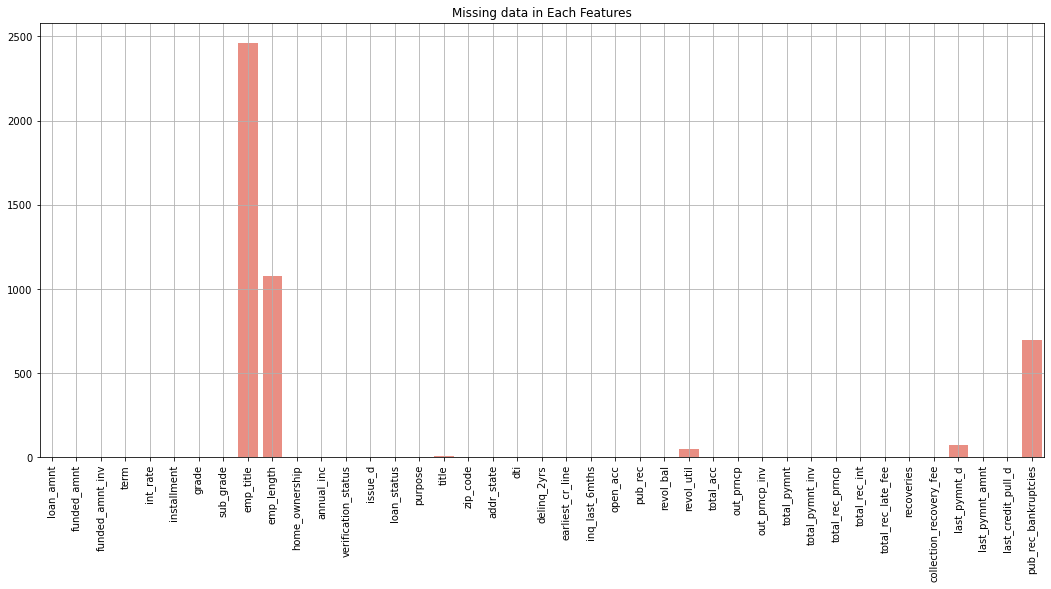

In [29]:
#Revisit Missing data info
plotMissingColumns(data)

###### <span style="color:blue">Observation </span>
>Now there are only 5 columns where data are missing

In [30]:
#Columns Left after doing initial Data Cleanup
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

# <span style="color:red"> Segregate Features Based on Business Values <span>

> <b>Feature data which will be available for Customer when they apply for Loan: </b>Loan Amount ,Interest Rate ,Term ,Annual Income, Loan Grade, Debt to Income Ratio, Applicant Income, Loan Purpose, Revolving Utilization of Credit, Employee Length


> <b>Feature data which will be not be available for Customer when they apply for Loan: </b> 'out_prncp','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'

# Heat Map For correlations between Features

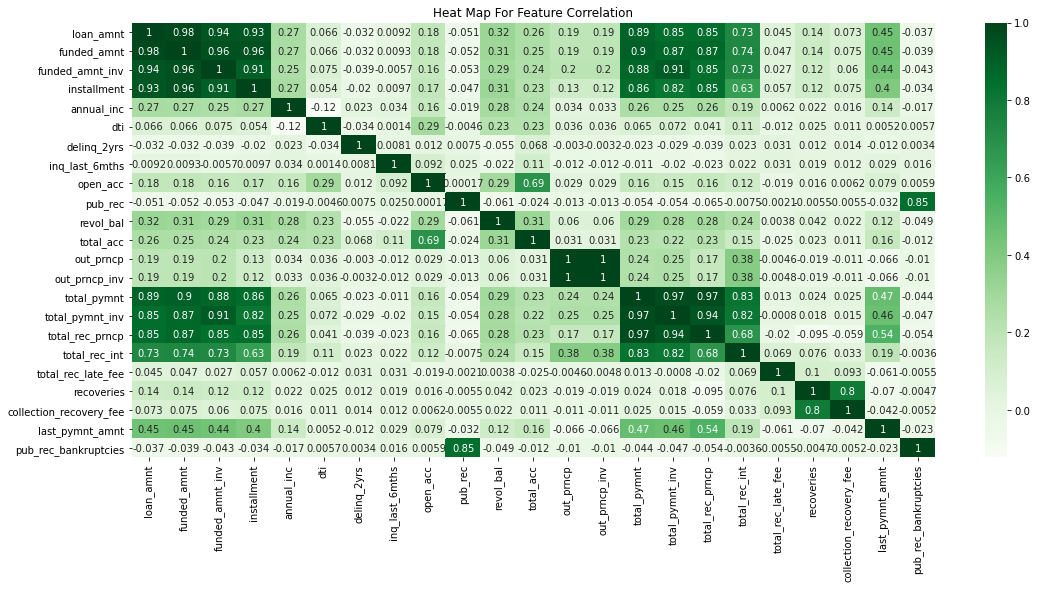

In [31]:
#Heat map based on correlation
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),cmap="Greens",annot=True)
plt.title("Heat Map For Feature Correlation")
plt.show()

###### <span style="color:blue">Observation </span>

> There are some columns in the data set which have high correlation so lets analyse those and if required may
  be we can drop some of them as feature with high correlation and so same impact on target variable will have.

### <div style="background-color: coral;font-size: 30px;">Feature Reduction based on Correlation</div>

### Features having high corelations ( loan_amnt, funded_amnt, funded_amnt_inv)

###### <span style="color:blue">Observation </span>
>1.loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

>2.funded_amnt: The total amount committed to that loan at that point in time.

>3.funded_amnt_inv : The total amount committed by investors for that loan at that point in time.

>Serve the same purpose that total amount given to borowwer

In [32]:
#data view
data.loc[:,['loan_amnt','funded_amnt','funded_amnt_inv']].head()

loan_amnt  funded_amnt  funded_amnt_inv
0       5000         5000           4975.0
1       2500         2500           2500.0
2       2400         2400           2400.0
3      10000        10000          10000.0
4       3000         3000           3000.0

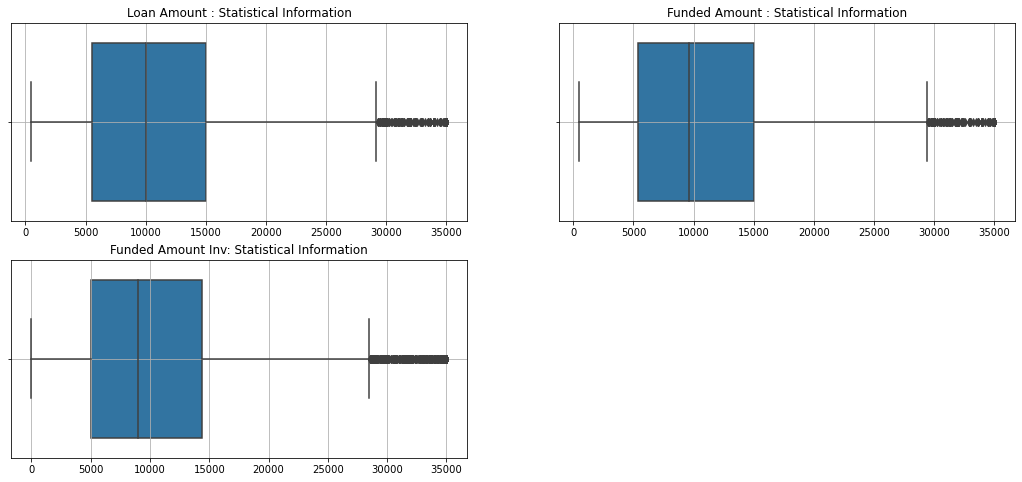

In [33]:
#Subplots for highly correlated features
f,ax = plt.subplots(2,2,figsize=(18,8))

sns.boxplot(data['loan_amnt'],ax =ax[0,0])
ax[0,0].set_title('Loan Amount : Statistical Information')
ax[0,0].set_xlabel('')
ax[0,0].grid("on")
sns.boxplot(data['funded_amnt'],ax =ax[0,1])
ax[0,1].set_title('Funded Amount : Statistical Information')
ax[0,1].grid("on")
ax[0,1].set_xlabel('')
sns.boxplot(data['funded_amnt_inv'],ax =ax[1,0])
ax[1,0].set_title('Funded Amount Inv: Statistical Information')
ax[1,0].grid("on")
ax[1,0].set_xlabel('')

#Delete extra plot
f.delaxes(ax[1][1])
plt.show()

###### <span style="color:blue">Observation </span>

>All there statistical plots looks simmilar for highly correlated Features

#### Delete funded_amnt_inv, funded_amnt as loan_amnt is highly correlated to it

In [34]:
# we are deleting the funded_amnt_inv because it has min value as zero as well , so keeping consideration of loan amount != 0
# will delete columns funded_amnt_inv and funded_amnt

#Loan Amount will be available at the time of Loan Application as well, so lets keep it and delete other two features

data.drop(['funded_amnt','funded_amnt_inv'],axis=1,inplace=True)

In [35]:
df_shape = data.shape
df_shape

(39717, 39)

## Features having high corelations ( out_prncp, out_prncp_inv)

In [36]:
#lets analyse other Feature which is highly correlated with value as 1

# 1. out_prncp	Remaining outstanding principal for total amount funded									
# 2. out_prncp_inv	Remaining outstanding principal for portion of total amount funded by investors									

data[data['out_prncp'] != 0].loc[:,['out_prncp','out_prncp_inv','loan_status']].head()

out_prncp  out_prncp_inv loan_status
4      524.06         524.06     Current
32    1849.10        1844.43     Current
39    2181.42        2177.03     Current
86    2637.34        2632.59     Current
95    3125.79        3120.68     Current

In [37]:
# lets drop one of the columns amoung between these two:

data.drop(['out_prncp_inv'],axis=1,inplace=True)

In [38]:
df_shape = data.shape
df_shape

(39717, 38)

#### Details about the Column Data Types

In [39]:
# data type describe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   term                     39717 non-null  object 
 2   int_rate                 39717 non-null  object 
 3   installment              39717 non-null  float64
 4   grade                    39717 non-null  object 
 5   sub_grade                39717 non-null  object 
 6   emp_title                37258 non-null  object 
 7   emp_length               38642 non-null  object 
 8   home_ownership           39717 non-null  object 
 9   annual_inc               39717 non-null  float64
 10  verification_status      39717 non-null  object 
 11  issue_d                  39717 non-null  object 
 12  loan_status              39717 non-null  object 
 13  purpose                  39717 non-null  object 
 14  title                 

#### Print First 5 Rows to Pick the columns for analysis ( use pd.set_option to display all)

In [40]:
# data head

#set column width for the display
pd.set_option('display.max_columns', 50)
data.head()

loan_amnt        term int_rate  installment grade sub_grade  \
0       5000   36 months   10.65%       162.87     B        B2   
1       2500   60 months   15.27%        59.83     C        C4   
2       2400   36 months   15.96%        84.33     C        C5   
3      10000   36 months   13.49%       339.31     C        C1   
4       3000   60 months   12.69%        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status         purpose  \
0            Verified  Dec-11   Fully Paid     credit_card   
1     Source Verified  Dec-11  Charged Off             car   
2        Not Verified  Dec-11   Fully Paid  small_business   
3     Source Verified  Dec-11   Fully Paid           other   
4     Source Verified  Dec-11      Current           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0           Jan-85               1         3        0      13648     83.70%   
1           Apr-99               5         3        0       1687      9.40%   
2           Nov-01               2         2        0       2956     98.50%   
3           Feb-96               1        10        0       5598        21%   
4           Jan-96               0        15        0      27783     53.90%   

   total_acc  out_prncp   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0          9       0.00   5863.155187          5833.84          5000.00   
1          4       0.00   1008.710000          1008.71           456.46   
2         10       0.00   3005.666844          3005.67          2400.00   
3         37       0.00  12231.890000         12231.89         10000.00   
4         38     524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0       Jan-15           171.62             May-16                   0.0  
1       Apr-13           119.66             Sep-13                   0.0  
2       Jun-14           649.91             May-16                   0.0  
3       Jan-15           357.48             Apr-16                   0.0  
4       May-16            67.79             May-16                   0.0

### <div style="background-color: coral;font-size: 30px;">Feature Extraction : Type Driven</div>

#### Convert Term ( dtype : Object) in integer Columns

In [41]:
#note : term does not have any missing columns
#lets analyze the term feature, unique values

data['term'].value_counts()

# as well on previous analysis term feature does not have any NULL columns

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [42]:
#Remove term keyword from the Feature to convert to integer
data['term'] = data['term'].apply(lambda x : int(x[:3]))

In [43]:
#After converting the data type to integer , lets see the term column
data[['term']].head(4)

term
0    36
1    60
2    36
3    36

#### Convert Int_rate ( dtype: Object) in float Columns

In [44]:
data['int_rate'].head(1)

0    10.65%
Name: int_rate, dtype: object

In [45]:
#note : int_rate does not have any missing columns

data['int_rate'] = data['int_rate'].apply(lambda x : float(x.replace('%','')))

In [46]:
#after converting the data type
data['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

#### Convert revol_util (dtype : Object) in float Columns

In [47]:
data['revol_util'].head(1)

0    83.70%
Name: revol_util, dtype: object

In [48]:
#note :revol_util does not have any missing columns

data['revol_util'] = data['revol_util'].apply(lambda x : float((str(x)).rstrip('%')))

In [49]:
#After converting the data type
data['revol_util'].head(2)

0    83.7
1     9.4
Name: revol_util, dtype: float64

#### Convert Object into DateTime For Feautre : earliest_cr_line

##### Function Created For Extracting Years & Month

In [50]:
#convert object to year and month columns and drop the original columns

from datetime import datetime
def convertToYear(x):
    dt = datetime.strptime(x,'%b-%y')
    return dt.year

def convertToMonth(x):
    dt = datetime.strptime(x,'%b-%y')
    return dt.month

def convertFeatureToDateTime(data, colName, colPrefix):
    data[colPrefix+'_year'] = data[colName].apply(lambda x : convertToYear(x))
    data[colPrefix+'_month'] = data[colName].apply(lambda x : convertToMonth(x))
    data.drop([colName],axis=1,inplace=True)    

In [51]:
#earliest_cr_line does not have any missing data

# earliest_cr_line	The month the borrower's earliest reported credit line was opened									
convertFeatureToDateTime(data,'earliest_cr_line','cr_line')

#### Convert Object into DateTime For Feautre : issue_d

In [52]:
#issue_d	The month which the loan was funded									
convertFeatureToDateTime(data,'issue_d','issue')

### <div style="background-color: coral;font-size: 30px;">Feature Extraction : Business Driven</div>

In [53]:
# if Loss is positive means Charged off loans else it will be Fully Paid or Current Loan, it will help to analyse total Loss
# around multiple prespective
data['Total_Loss'] = data['loan_amnt']-data['total_pymnt']
data.loc[:,['Total_Loss','loan_status']].head()

Total_Loss  loan_status
0  -863.155187   Fully Paid
1  1491.290000  Charged Off
2  -605.666844   Fully Paid
3 -2231.890000   Fully Paid
4  -513.330000      Current

### <div style="background-color: coral;font-size: 30px;">Analyse the Target Feature : Loan_status</div>

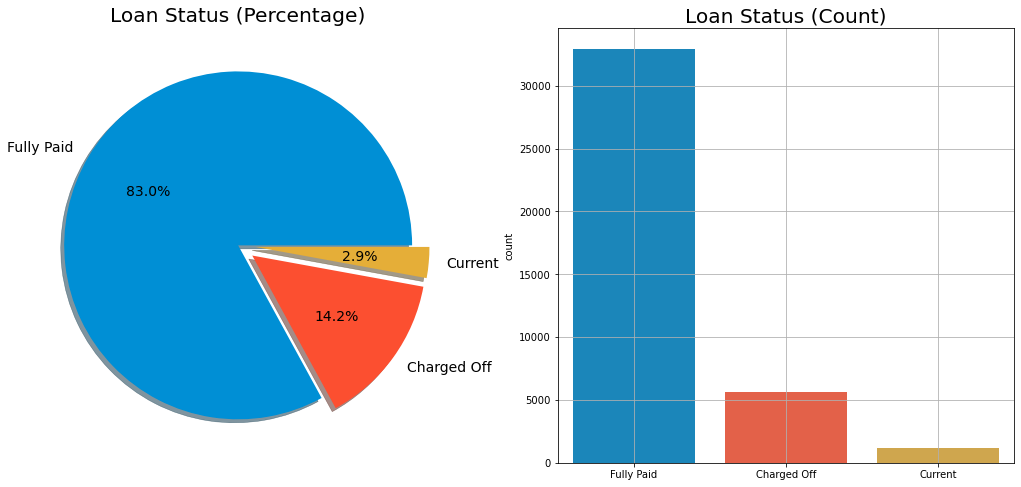

In [54]:
f, ax = plt.subplots(1,2,figsize=(18,8))

plt.style.use('fivethirtyeight')
data['loan_status'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,explode=[0,0.1,0.1])
ax[0].set_title("Loan Status (Percentage)")
ax[0].set_ylabel('')

sns.countplot(data['loan_status'])
ax[1].set_title("Loan Status (Count)")
ax[1].set_xlabel("")
plt.grid("on")

plt.show()

###### <span style="color:blue">Observation </span>

> There are 14.2 % records in dataset which results to Charged off Loan Status (default loan) 

>seems to be Skewed data as there are only 14.2% of data available for analysis of loan defaults. 
>real world application may be we need more instances of Charged off rows if its there

In [55]:
# 2.9% records are in current status , as well it won't lets us help in deciding the target result i.e loan is going to be default
# or not , so lets drop these and convert the loan status to label encoding

# Charged off -----> 1
# Fully Paid ------> 0

#set current data set to dataset1 in case we need to redo anything
#dataset1 = data

#drop the rows having Loan status as current

data = data[data['loan_status']!='Current']


In [56]:
#after Dropping Current Loans
data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [57]:
print("Percentage of loan going to be charged of : ", round((data['loan_status'].value_counts()['Charged Off'] / df_shape[0])*100,2),'%') 

Percentage of loan going to be charged of :  14.17 %


# Encode the loan_status (Categorical variable ) to ( 0/1)

In [58]:
#now encode the loan status columns
# Charged off -----> 1
# Fully Paid ------> 0

data['loan_status_code'] = data['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [59]:
data.loc[:5,['loan_status_code','loan_status']]

loan_status_code  loan_status
0                 0   Fully Paid
1                 1  Charged Off
2                 0   Fully Paid
3                 0   Fully Paid
5                 0   Fully Paid

In [60]:
# we will drop the loan_status after analysis as we already have it in numeric form for modeling

### Lets first analyse Object Data Types (Categorical Features)

In [61]:
#categorical Variables
data.select_dtypes(include='object').head()

grade sub_grade             emp_title emp_length home_ownership  \
0     B        B2                   NaN  10+ years           RENT   
1     C        C4                 Ryder   < 1 year           RENT   
2     C        C5                   NaN  10+ years           RENT   
3     C        C1   AIR RESOURCES BOARD  10+ years           RENT   
5     A        A4  Veolia Transportaton    3 years           RENT   

  verification_status  loan_status         purpose  \
0            Verified   Fully Paid     credit_card   
1     Source Verified  Charged Off             car   
2        Not Verified   Fully Paid  small_business   
3     Source Verified   Fully Paid           other   
5     Source Verified   Fully Paid         wedding   

                                   title zip_code addr_state last_pymnt_d  \
0                               Computer    860xx         AZ       Jan-15   
1                                   bike    309xx         GA       Apr-13   
2                   real estate business    606xx         IL       Jun-14   
3                               personel    917xx         CA       Jan-15   
5  My wedding loan I promise to pay back    852xx         AZ       Jan-15   

  last_credit_pull_d  
0             May-16  
1             Sep-13  
2             May-16  
3             Apr-16  
5             Jan-16

In [62]:
# Missing value in Categorical Variable
data.select_dtypes(include='object').isnull().sum()

grade                     0
sub_grade                 0
emp_title              2386
emp_length             1033
home_ownership            0
verification_status       0
loan_status               0
purpose                   0
title                    11
zip_code                  0
addr_state                0
last_pymnt_d             71
last_credit_pull_d        2
dtype: int64

### <div style="background-color: coral;font-size: 30px;">Feature Analysis : Univariate / Segmented / Bivariate</div>

### <div style="background-color: green;font-size: 30px;color:white">loan_amnt : (Continous Variable)</div>

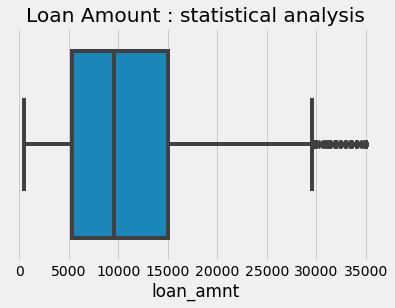

In [63]:
#funded amnt : statistical analysis
sns.boxplot(data['loan_amnt'])
plt.title('Loan Amount : statistical analysis')
plt.show()

###### <span style="color:blue">Observation </span>

>Most Loan Amount lies between 5K to 15K and there seems to be some outlier lets analyse it<br>
>Min Loan Amount : 500
>Max Loan Amount : 35000

In [64]:
#get statistical info
data['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

### <div style="background-color: coral;font-size: 20px;">Outlier Check</div>

In [65]:
Q1 = data['loan_amnt'].quantile(.25)
Q3 = data['loan_amnt'].quantile(.75)

#InterQuantile Range
IQR = Q3-Q1
IQR

9700.0

In [66]:
#anamolies vs outlier classification
data[data['loan_amnt'] > (Q3+1.5*IQR)]['loan_status'].value_counts() 

Fully Paid     836
Charged Off    252
Name: loan_status, dtype: int64

In [67]:
#percentage of rows it contribute to data set
round((920/df_shape[0])*100,2)

2.32

In [68]:
#there are 920 rows which is outlier , i.e. funded amount is much more than usual amount

# but that is 2.32 % of rows in dataset so we can't drop these rows

In [69]:
#max value is 35000, so let check how many rows there for higher loan amount
data[data['loan_amnt'] == 35000].shape

(601, 42)

In [70]:
#lets analyse for higher value of loan_amnt
len_dataset = data[data['loan_amnt'] == 35000].shape[0]
round((len_dataset/df_shape[0])*100,2)

1.51

In [71]:
#for max loan amount alos there are 601 rows which contribute to 1.51% of rows so we don't drop it

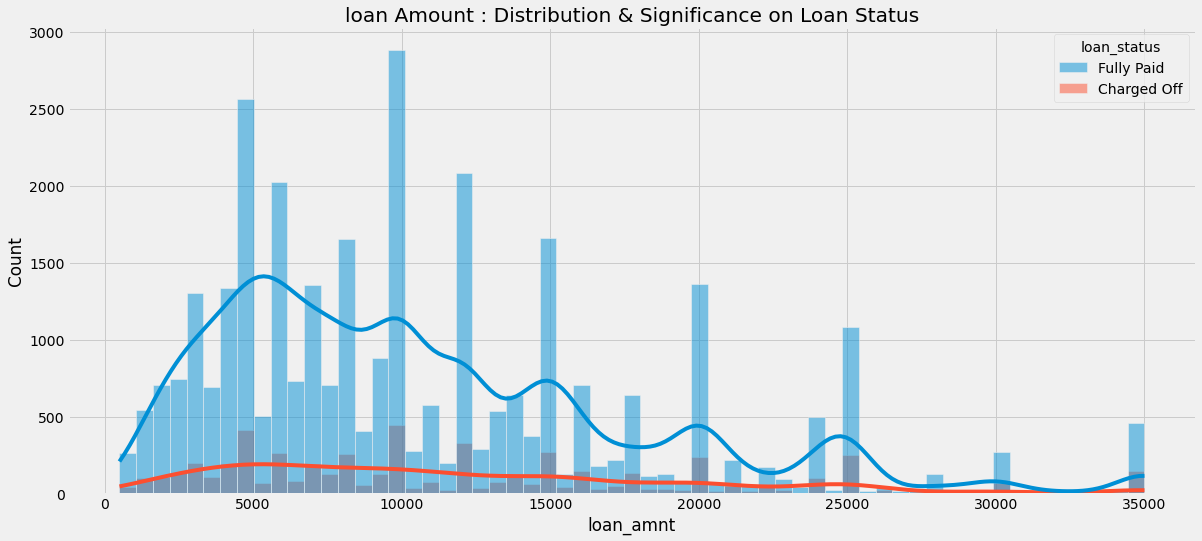

In [72]:
# does the laon amount has any significance on loan default
plt.figure(figsize=(18,8))
sns.histplot(data=data, x='loan_amnt',hue='loan_status',kde=True)
plt.title('loan Amount : Distribution & Significance on Loan Status')
plt.show()

###### <span style="color:blue">Observation </span>

>Loan amnt Q1 & Q4 lies between 5000 to 15000 and charged off loans are also max in this range only 
this may be impact of the data set i.e. higher dataset details are available from here only.

>Lets further analyse via segmented Analysis

### <div style="background-color: coral;font-size: 20px;">Function For Segmented Univariate Analysis</div>

In [73]:
def segmentedUnivariateAnalysis(data,col):
    df_seg = data.loc[:,[col,'loan_status']]

    derCol= col+'_seg'
    #segment continous variable into quantile segments
    df_seg[derCol] = pd.qcut(df_seg[col],4,labels=['Q1','Q2','Q3', 'Q4'])


    df = df_seg.groupby([derCol,'loan_status'])['loan_status'].count().unstack()
    print()
    print()
    print('********SEGMENTED Analysis ( Q1 ( 0-25%) , Q2 (25-50%) , Q3 (50-75%) , Q4 (75-100%) ******************************')

    #plot Frequency distribution
    sns.countplot(df_seg[derCol])
    plt.title(col+': Frequency distribution over each quantile')

    #plot count distribution based on loan status
    f,ax = plt.subplots(1,2,figsize=(18,5))
    sns.pointplot(data = df, x=df.index,y='Charged Off',ax=ax[0],color='red')
    ax[0].set_title(col+ ': Charged Off Loan Frequency ')
    sns.pointplot(data = df, x=df.index,y='Fully Paid',ax=ax[1],color='green')
    ax[1].set_title(col+ ': Fully Paid Loan Frequency ')

    #plot percentage distribution based on loan status
    df['Total'] = df['Charged Off'] + df['Fully Paid']
    df['Charged_Off_percentage'] = df['Charged Off'] / df['Total']
    df['Fully_Paid_percentage'] = df['Fully Paid'] / df['Total']
    f,ax = plt.subplots(1,2,figsize=(18,5))
    sns.pointplot(data=df,x=df.index,y='Charged_Off_percentage',ax=ax[0],color='red')
    ax[0].set_title(col+': Charged Off Percentage over Quantile')
    sns.pointplot(data=df,x=df.index,y='Fully_Paid_percentage',ax=ax[1],color='green')
    ax[1].set_title(col+': Fully Paid Percentage over Quantile')
    plt.show()
    
    #delete temp dataset
    del df




********SEGMENTED Analysis ( Q1 ( 0-25%) , Q2 (25-50%) , Q3 (50-75%) , Q4 (75-100%) ******************************


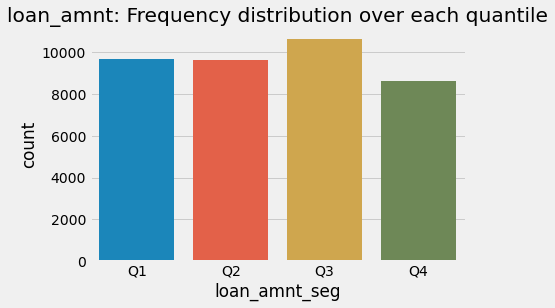

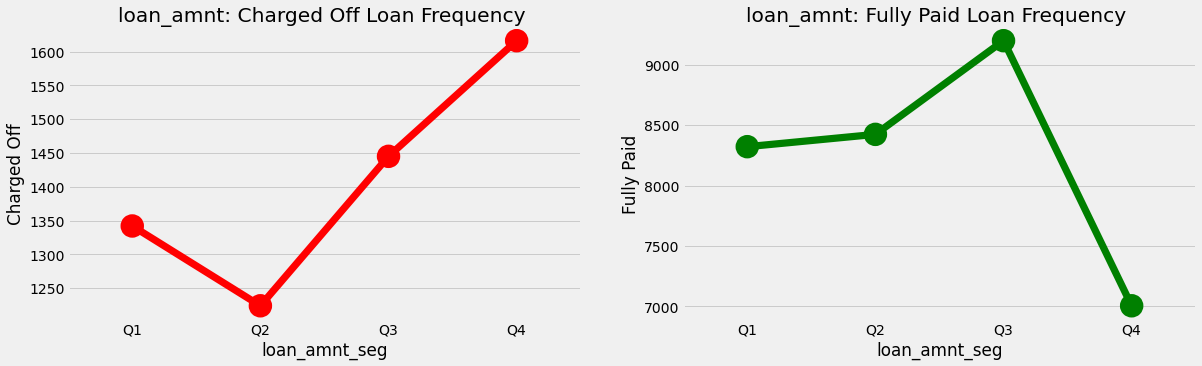

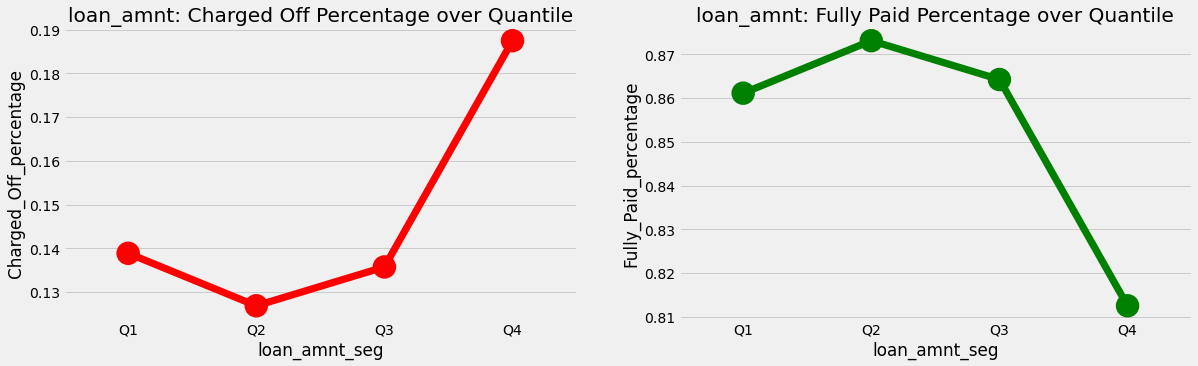

In [74]:
segmentedUnivariateAnalysis(data,'loan_amnt')

###### <span style="color:blue">Observation </span>

> In Each Quartile there is almost equal distribution of the Loan Amount Frequency

> As Loan Amount Increases, both Charged Off Loan Count and Percentage increases, so Loan_amnt has impact on loan charged off condition

>On the other side As loan Amount Increase the Fully Paid loan Percentage decreases.

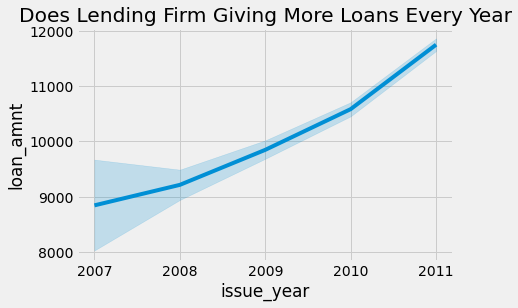

In [75]:
sns.lineplot(data=data,x='issue_year',y='loan_amnt',estimator=np.mean)
plt.title('Does Lending Firm Giving More Loans Every Year')
plt.show()

###### <span style="color:blue">Observation </span>

>Each Year company is giving loans of higher total loan amount, and may increase the chances of get loans charged off.

### <div style="background-color: green;font-size: 30px;color:white">Term ( discreate Variable)</div>


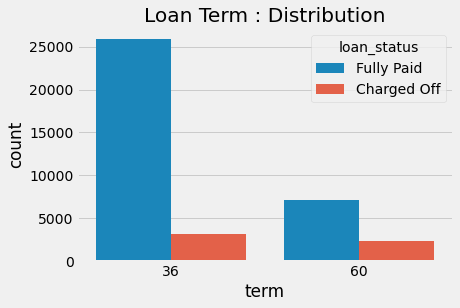

In [76]:
#univariate Analysis
sns.countplot(data=data, x='term', hue='loan_status')
plt.title('Loan Term : Distribution')
plt.show()

###### <span style="color:blue">Observation </span>

>Mostly loan is taken for lower term i.e. 36 months

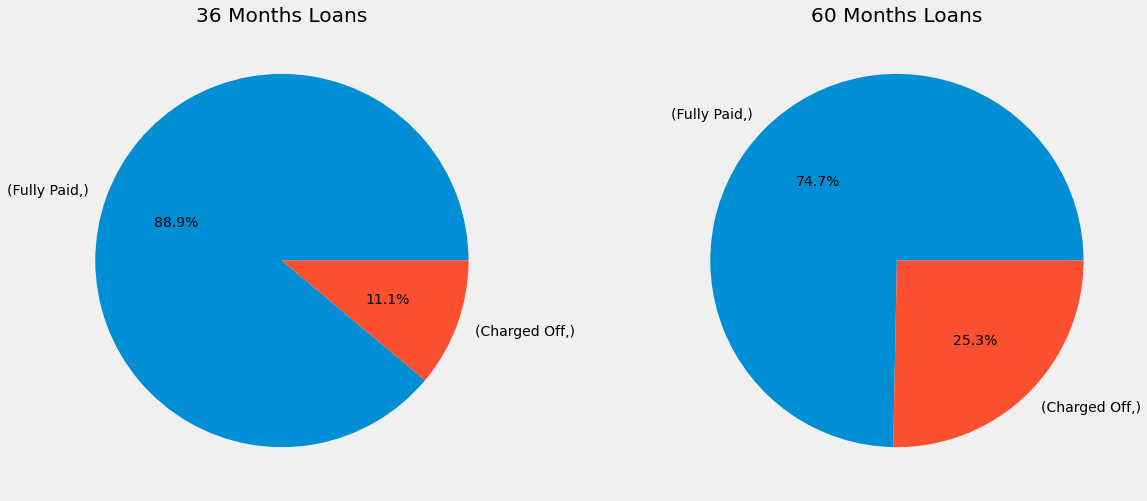

In [77]:
f,ax = plt.subplots(1,2,figsize=(18,8))

term_val = list(data['term'].value_counts().index)
for i,j in enumerate(term_val):
    data[data['term']==j].loc[:,['loan_status']].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[i])
    ax[i].set_ylabel('')
    ax[i].set_title(str(j) +' Months Loans')

plt.show()

###### <span style="color:blue">Observation </span>

> Most Loans are given for the 36 Months but there is a higher percentage of loans which is getting charged off belongs
to 60 Months Loans i.e. 25%

>14% difference of Loans gettting charged off from 60 Months to 36 Months.
>As Loan Term increase greater chances of Loans getting charged off

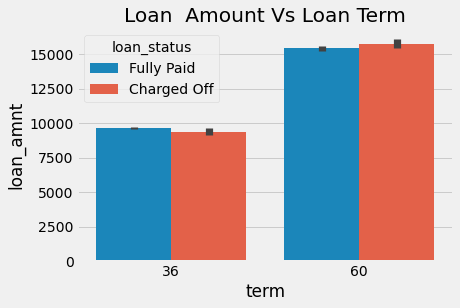

In [78]:
#Bivariate Analysis
sns.barplot(data=data, x='term',y='loan_amnt',hue='loan_status')
plt.title('Loan  Amount Vs Loan Term')
plt.show()

###### <span style="color:blue">Observation </span>

>Loans of higher amount has been given for longer time period (60 Months) and with increase in loan amount and loan term there is greater chances of Loans getting charged off.

##### Pivot Table

In [79]:
pivot_table = pd.pivot_table(data, values='loan_amnt', index=['loan_status'],
                    columns=['term'], aggfunc=np.sum)
pivot_table

term                36         60
loan_status                      
Charged Off   30297400   37813975
Fully Paid   248818675  109231050

In [80]:
#Max loan is given for the 60 Month

### <div style="background-color: green;font-size: 30px;color:white">int_rate (continous Variable)</div>

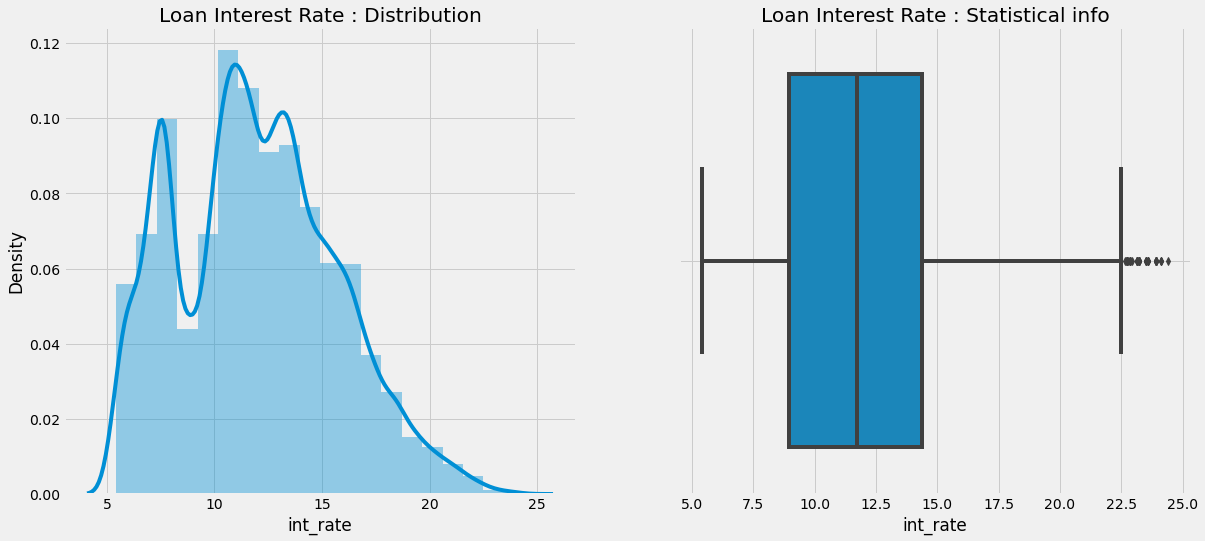

In [81]:
#univariate Analysis
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.distplot(data['int_rate'],kde=True,bins=20,ax=ax[0])
ax[0].set_title('Loan Interest Rate : Distribution')


sns.boxplot(data['int_rate'],ax=ax[1])
ax[1].set_title('Loan Interest Rate : Statistical info')
plt.grid("on")
plt.show()

###### <span style="color:blue">Observation </span>

> Most Loans are given on the interest rate of 8.94% to 14.38%

>Min interest Rate is 5% and Max is 25%

### <div style="background-color: coral;font-size: 20px;">Outlier Check</div>

In [82]:
#loans greater than 22.5 int_rate
round((len(data[data['int_rate'] >= 22.5])/df_shape[0])*100,2)

0.16

In [83]:
# Rows Drooped : percentage of rows in outlier is very less so lets drop it off
data = data[data['int_rate'] <22.5]

In [84]:
#update data shape
df_shape=data.shape



********SEGMENTED Analysis ( Q1 ( 0-25%) , Q2 (25-50%) , Q3 (50-75%) , Q4 (75-100%) ******************************


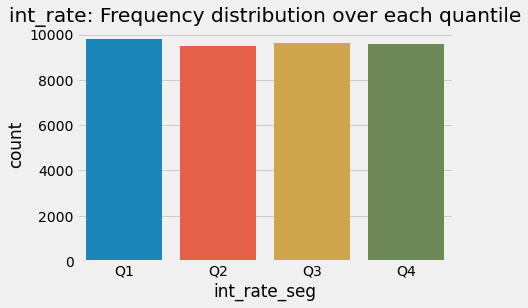

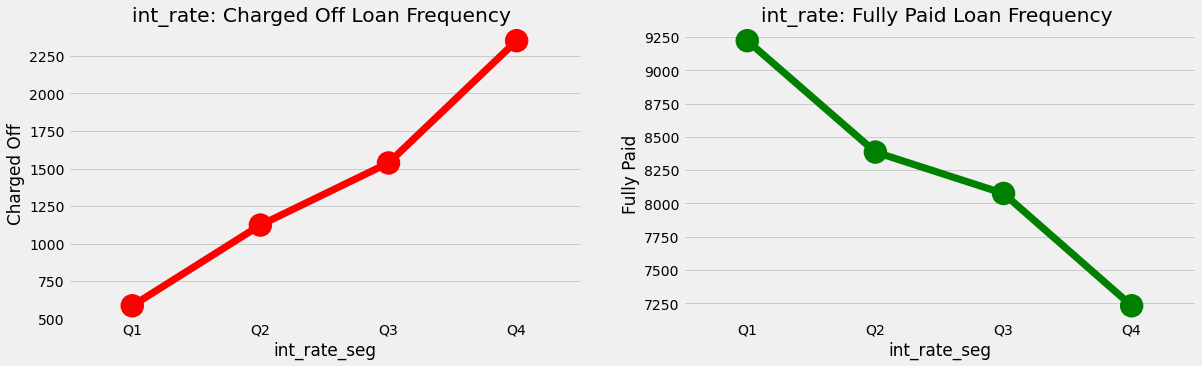

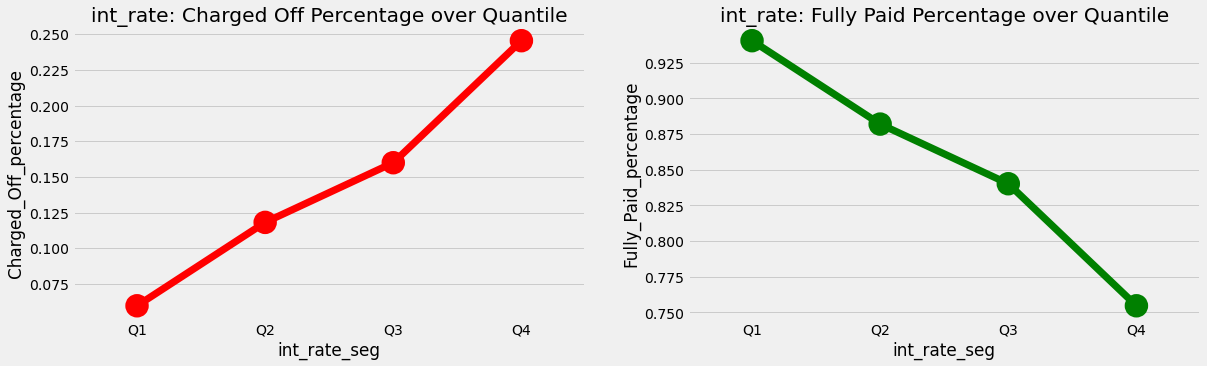

In [85]:
segmentedUnivariateAnalysis(data,'int_rate')

###### <span style="color:blue">Observation </span>

> Charged Off Loans Count and Percentage Increases with Loan Interest Rate.

> Fully Paid Loans Count and Percentage Decreases with Loan Interest Rate.

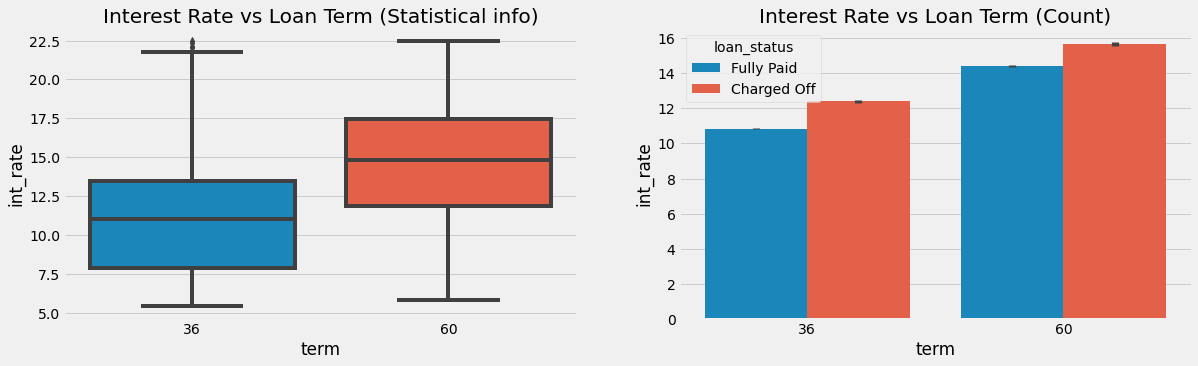

In [86]:
#Bivariate Analysis
f,ax = plt.subplots(1,2,figsize=(18,5))
sns.boxplot(data=data,x='term',y='int_rate',ax=ax[0])
ax[0].set_title('Interest Rate vs Loan Term (Statistical info)')

sns.barplot(data=data, x='term',y='int_rate',hue='loan_status',ax=ax[1])
ax[1].set_title('Interest Rate vs Loan Term (Count)')
plt.show()

###### <span style="color:blue">Observation </span>

> 60 months loans are given at higher interest rate 
> and higher interest rate loans tends more to be charged off loan

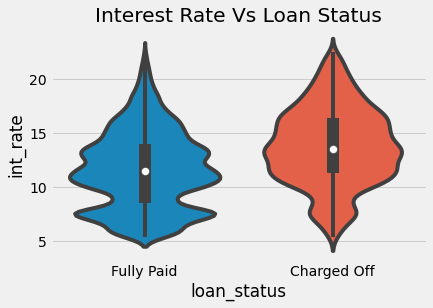

In [87]:
#Bivariate Analysis
sns.violinplot(data=data,x='loan_status',y='int_rate')
plt.title('Interest Rate Vs Loan Status')
plt.show()

###### <span style="color:blue">Observation </span>

>int_rate between 10 to 15% has highest chance of charged off

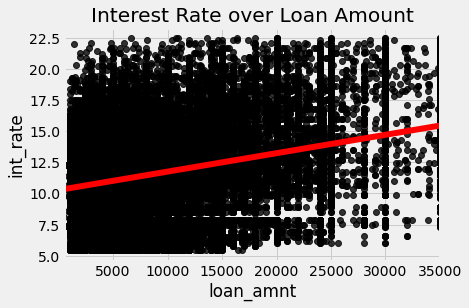

In [88]:
#Bivariate Analysis : int_rate vs loan_amnt

sns.regplot(data=data, x='loan_amnt',y='int_rate',scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title('Interest Rate over Loan Amount')
plt.show()

###### <span style="color:blue">Observation </span>

> int_rate incerease with incerease of funded amnt, but there is wide dark spread so 5000 rs loan amnt we can get in different rate of int_rate its not fixed , it will depend on term of loan

### <div style="background-color: green;font-size: 30px;color:white">installment (discrete numerical Variable)</div>

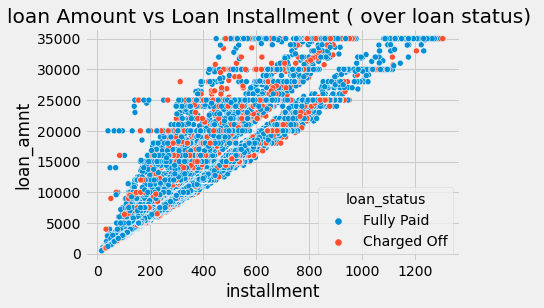

In [89]:
#Trivariate Analysis
sns.scatterplot(data=data,x='installment',y='loan_amnt',hue='loan_status')
plt.title('loan Amount vs Loan Installment ( over loan status) ')
plt.show()

###### <span style="color:blue">Observation </span>

>higher the loan amount more is the installement

>on higher installment, charged off loans count is more
compared to lower installments ( major lies between 400 to 800 installments period)

>Based on Scatter Plot , does not seems to have any outlier as such, as for every installement period there is good amount of loan exist in that bucket

### <div style="background-color: green;font-size: 30px;color:white">grade ( Categorical Variable)</div>

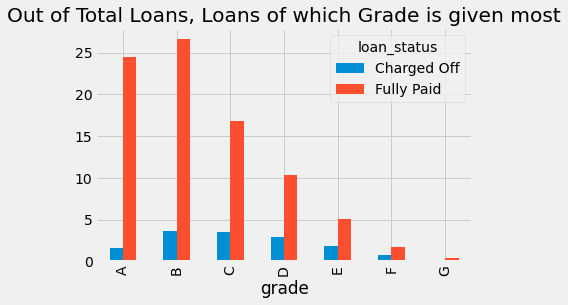

In [90]:
grade_loan = data.groupby(['grade','loan_status'])['loan_status'].count()
grade_loan =  ((grade_loan/df_shape[0])*100).unstack()
#print(grade_loan)

grade_loan.plot.bar()
plt.title('Out of Total Loans, Loans of which Grade is given most')
plt.show()

###### <span style="color:blue">Observation </span>

>Loan of A & B grade are Given most

###### Function to Show Chareged off Loans Percentage

In [91]:
#function to show charged off percentage in a particular category
def showchargedoffpropation(data,col):
    df = data.groupby([col,'loan_status'])['loan_status'].count().unstack()
    df['Total'] = df['Charged Off'] + df['Fully Paid']
    df['Charged_Off_percentage'] = df['Charged Off'] / df['Total']
    plt.figure(figsize=(18,8))
    sns.barplot(data=df,x=df.index,y='Charged_Off_percentage')
    plt.title('Charged Off Percentage over '+col)
    plt.show()

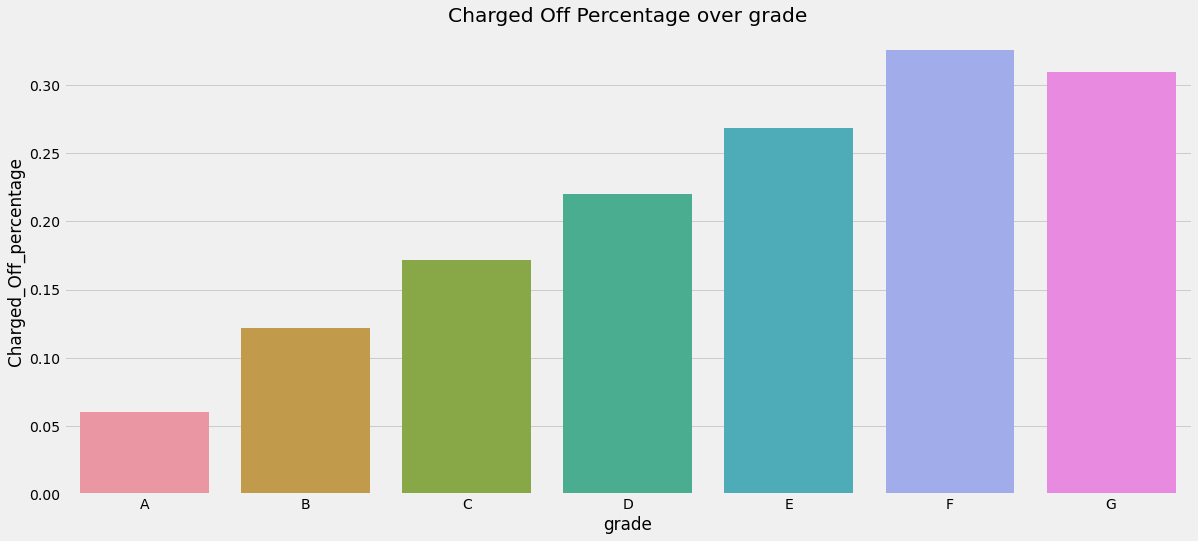

In [92]:
showchargedoffpropation(data,'grade')

###### <span style="color:blue">Observation </span>

>there is a significance of grade on loan charged off ; i.e grade A & B loan is less charged off than grade B , C, D, E

> loans of grade A & B is given more frequently than other grade

> Chances of Getting Charged Off : Grade G >F > E> D> C > B > A 

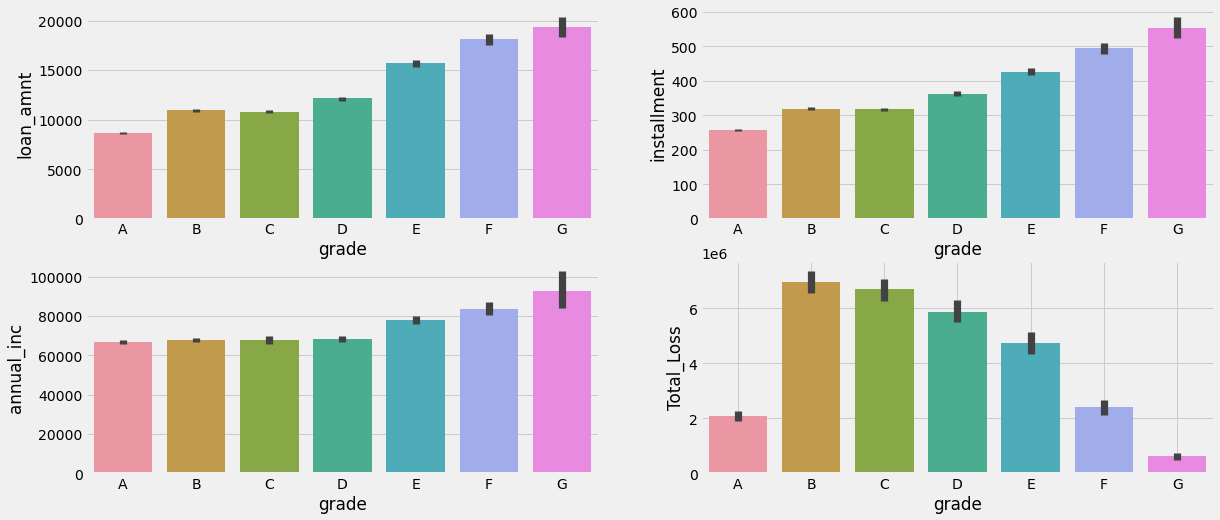

In [93]:
#Bivariate Analysis
#does grade is basedon funded amnt or installemt
f,ax = plt.subplots(2,2,figsize=(18,8))
sns.barplot(data=data,x='grade',y='loan_amnt',ax=ax[0,0],estimator=np.mean,order='ABCDEFG')
plt.grid("on")
sns.barplot(data=data,x='grade',y='installment',ax=ax[0,1],estimator=np.mean,order='ABCDEFG')
plt.grid("on")
sns.barplot(data=data,x='grade',y='annual_inc',ax=ax[1,0],estimator=np.mean,order='ABCDEFG')
plt.grid("on")
sns.barplot(data=data[data['loan_status']=='Charged Off'],x='grade',y='Total_Loss',ax=ax[1,1],estimator=np.sum,order='ABCDEFG')
plt.grid("on")
plt.show()

###### <span style="color:blue">Observation </span>

> grade which is given frequently is A, B, C is of lower amount / installments than grade E, F, D, G 

> Max loss to lending firm has to suffer from grade B > C > D > E > F > A > G

> Grade G Loans are given to high annaual income People.

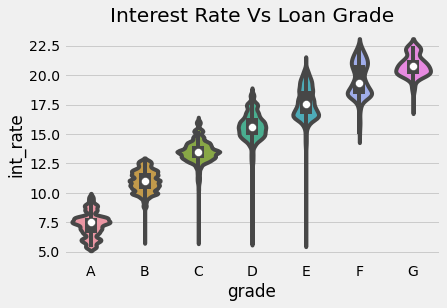

In [94]:
#Bivariate Analysis
#grade vs int_rate

sns.violinplot(data=data,x='grade',y='int_rate',order="ABCDEFG")
plt.title('Interest Rate Vs Loan Grade')
plt.show()

###### <span style="color:blue">Observation </span>

>Higher grade Loans has higher int rate

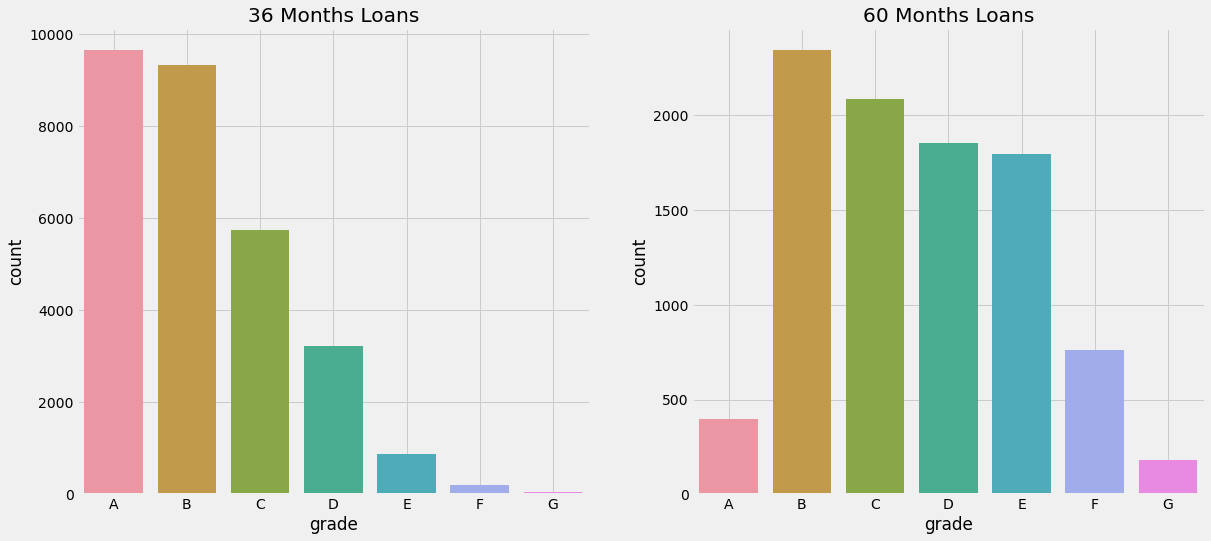

In [95]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.countplot(data=data[data['term']==36],x='grade',ax=ax[0],order='ABCDEFG')
ax[0].set_title('36 Months Loans')
ax[0].grid("on")
sns.countplot(data=data[data['term']==60],x='grade',ax=ax[1],order='ABCDEFG')
ax[1].set_title('60 Months Loans')
ax[1].grid("on")
plt.show()

###### <span style="color:blue">Observation </span>

>For 36 month grade A loan is given most

>For 60  month grade B loan is given most

>Loan count decerease as we go from A->B->C->D->E->F->G

### <div style="background-color: yellow;font-size: 30px;color:black">Sub_grade ( Categorical Variable)</div>

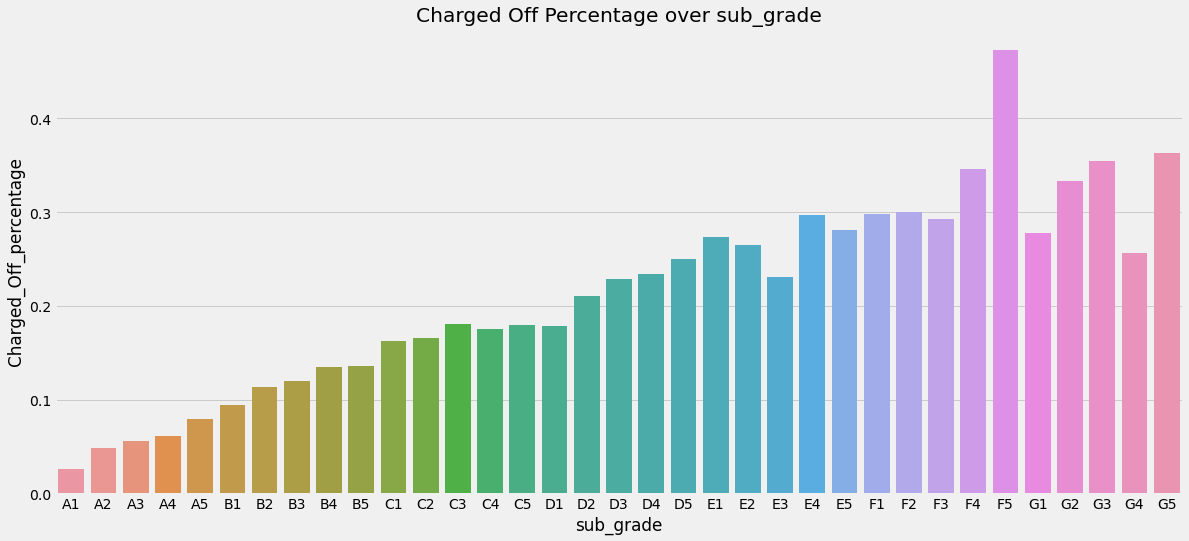

In [96]:
showchargedoffpropation(data,'sub_grade')

###### <span style="color:blue">Observation </span>

> Sub_grade show same pattern as of grade Feature over charged off percentage i.e. increase from A to G, and as this is a categorical variable with lots of category may be we can think of dropping it off

#### Let Encode the grade & sub-grade ( from Label to dicreate numerical value)

In [97]:
data['grade_code'] = data['grade'].replace(['A','B','C','D','E','F','G'],[1,2,3,4,5,6,7])

In [98]:
#as well grade col have encoding in grade_code , so will it
data.drop(['grade'],axis=1,inplace=True)

In [99]:
df_shape=data.shape
df_shape

(38512, 42)

In [100]:
#Sub_grade perform same as grade so lets drop at the end of EDA

### <div style="background-color: red;font-size: 30px;color:white">emp_title (dtype: Object)</div>

In [101]:
emp_title_loan = data.groupby(['emp_title','loan_status'])['loan_status'].count().unstack()

In [102]:
emp_title_loan.columns

Index(['Charged Off', 'Fully Paid'], dtype='object', name='loan_status')

In [103]:
emp_title_loan[((emp_title_loan['Charged Off'].isnull() == False) & (emp_title_loan['Fully Paid'].isnull() == False))]

loan_status       Charged Off  Fully Paid
emp_title                                
24 Hour Fitness           1.0         2.0
24 hour fitness           1.0         1.0
3M Company                1.0         1.0
A Touch of Italy          1.0         1.0
ABM                       1.0         1.0
...                       ...         ...
walmart                   4.0        19.0
wells fargo               3.0         7.0
wells fargo bank          1.0         7.0
wellsfargo                1.0         1.0
ymca                      1.0         2.0

[813 rows x 2 columns]

###### <span style="color:blue">Observation </span>

>There are around 818 rows where person belongs to a company where their is both record of charged as well Fully paid

>there are miss spelling of the company name as well e.g well fargo, wells fargo bank

>there are 2K missing records

In [104]:
# so lets drop this columns
data.drop(['emp_title'],axis=1,inplace=True)

In [105]:
df_shape = data.shape

### <div style="background-color: yellow;font-size: 30px;color:black">emp_length ( Categorical Variable)</div>

In [106]:
#missing values
data['emp_length'].isnull().sum()

1033

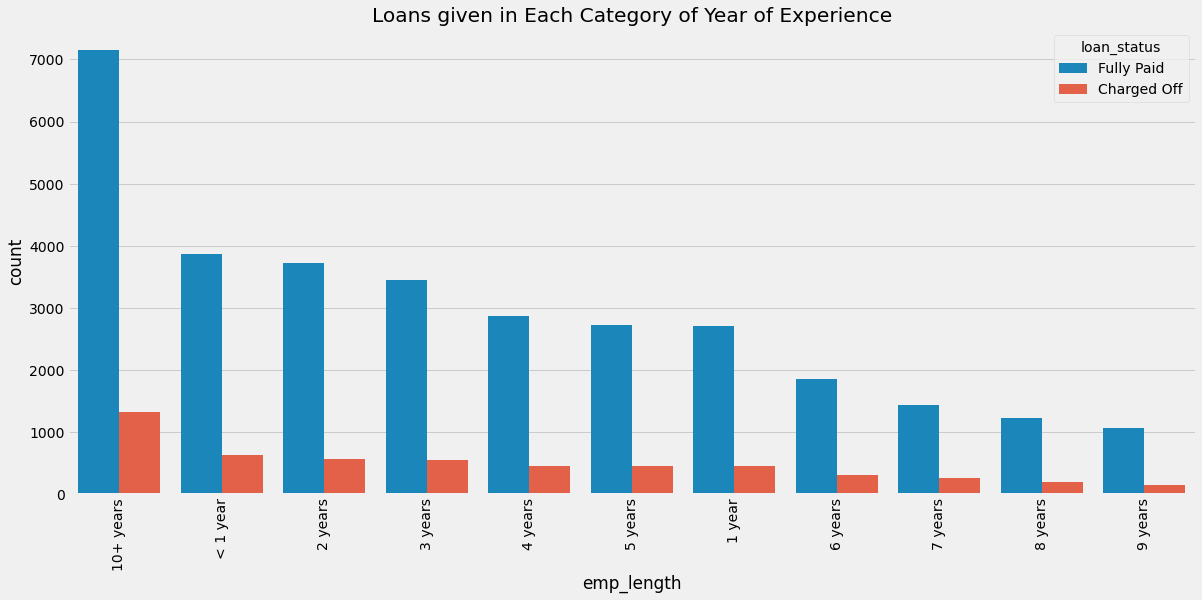

In [107]:
#Univariate Analysis
df_emp = data['emp_length'].value_counts()
plt.figure(figsize=(18,8))
sns.countplot(data = data, x="emp_length",hue='loan_status',order = df_emp.index)
plt.xticks(rotation=90)
plt.title('Loans given in Each Category of Year of Experience')
plt.show()

###### <span style="color:blue">Observation </span>

> 10+ years people get most loans

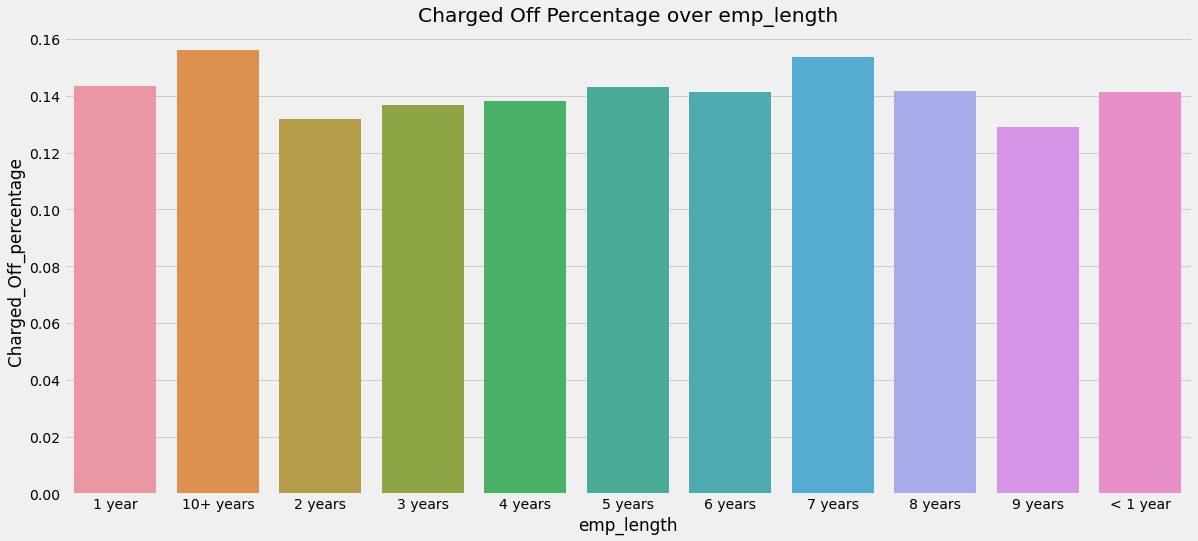

In [108]:
showchargedoffpropation(data,'emp_length')

###### <span style="color:blue">Observation </span>

>There is no direct impact of no.of years of person job on loan charged off

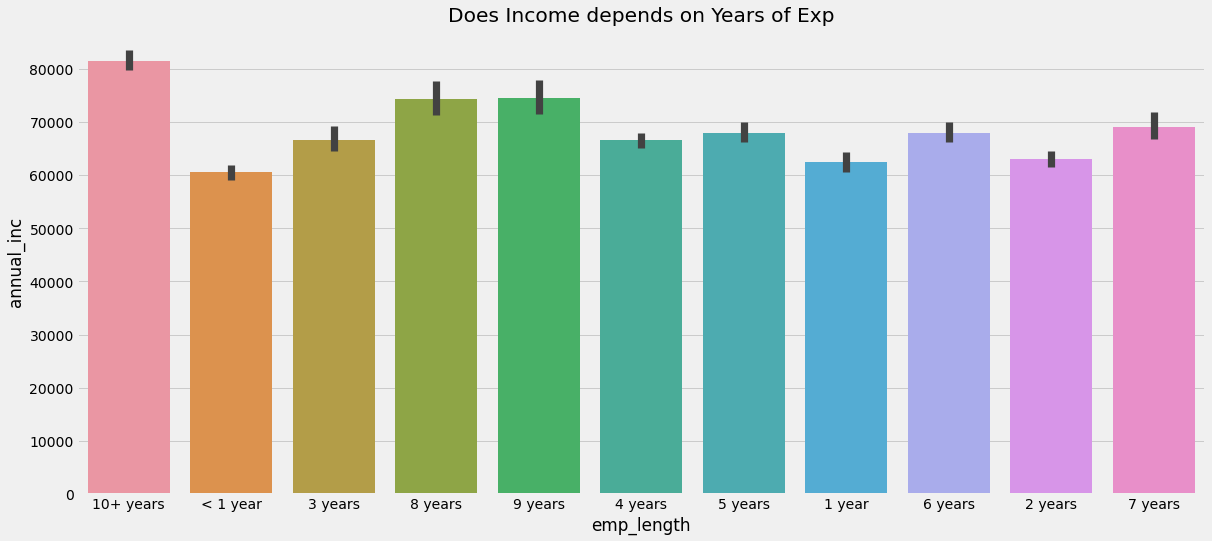

In [109]:
#does salary depend on no. of years of experience
plt.figure(figsize=(18,8))
sns.barplot(data = data, x ='emp_length',y='annual_inc')
plt.title('Does Income depends on Years of Exp')
plt.show()

###### <span style="color:blue">Observation </span>

> No salary does not depend on no of years of experience

>there is no direct correlation between exp_year and salary, just a slight impact we can see

### <div style="background-color: coral;font-size: 20px;">Imputation of missing values in emp_length</div>

In [110]:
data['emp_length'].mode()

0    10+ years
dtype: object

In [111]:
# Replace Null values with mode value i.e. 10+ years
data['emp_length'] = data['emp_length'].fillna('10+ years')

In [112]:
data['emp_length'].isnull().sum()

0

### <div style="background-color: coral;font-size: 20px;">Encode emp_length ( Categorical Variable) to discreate numerical value</div>

In [113]:
#Convert emp_length categorical value to numerical value
data['emp_length'] = data['emp_length'].replace(['< 1 year'],['0 Year'])

In [114]:
#extract numbers from string
data['emp_length'] = data['emp_length'].str.extract('(\d+)')

In [115]:
# Feature Extraction ( Type Driven) convert datatype from string to int
data['emp_length'] = data['emp_length'].astype(int)

In [116]:
data['emp_length'].head(2)

0    10
1     0
Name: emp_length, dtype: int32

### <div style="background-color: yellow;font-size: 30px;color:black">home_ownership (categorical variable)</div>

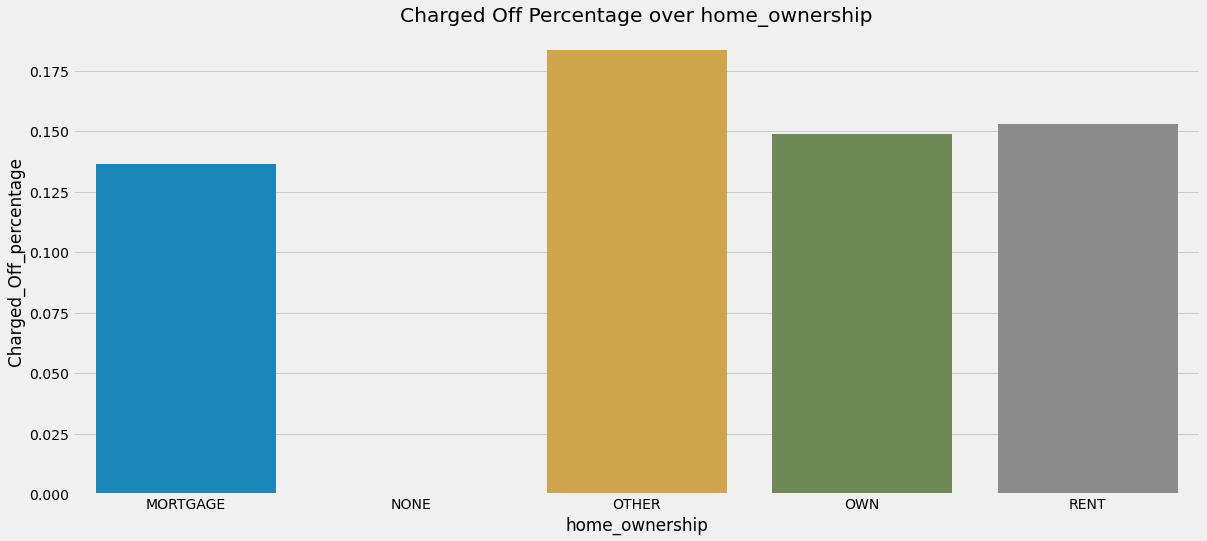

In [117]:
showchargedoffpropation(data,'home_ownership')

###### <span style="color:blue">Observation </span>

>There is no significance difference of charged off loans Percentage based on Home Ownership. 

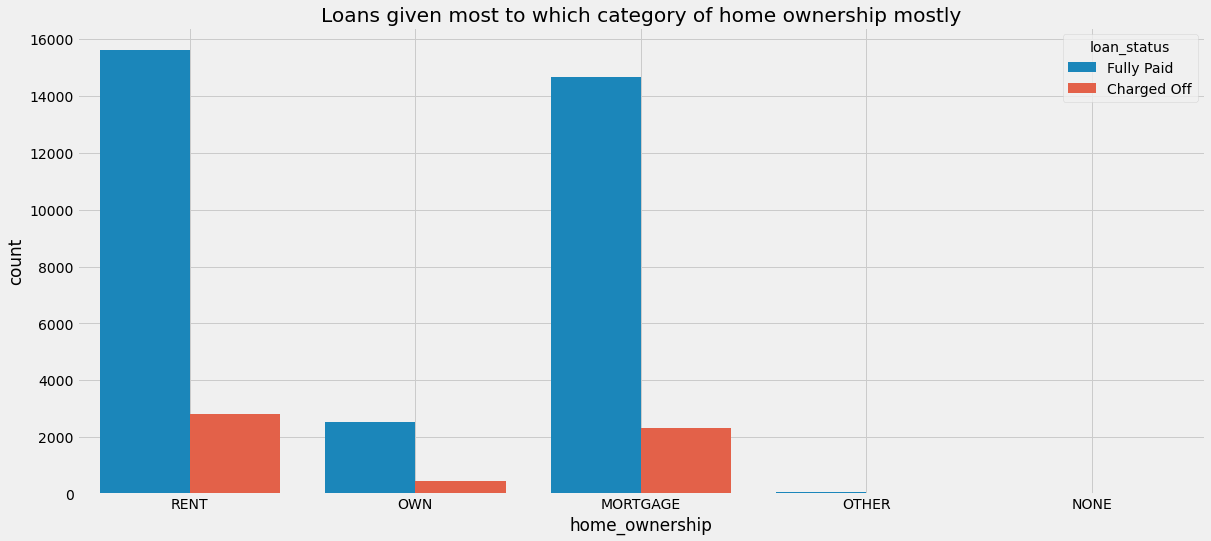

In [118]:
plt.figure(figsize=(18,8))
sns.countplot(data=data,x="home_ownership",hue='loan_status')
plt.grid("on")
plt.title('Loans given most to which category of home ownership mostly')
plt.show()

###### <span style="color:blue">Observation </span>

>Borrower having rent or Mortage ownership have taken the loans mostly

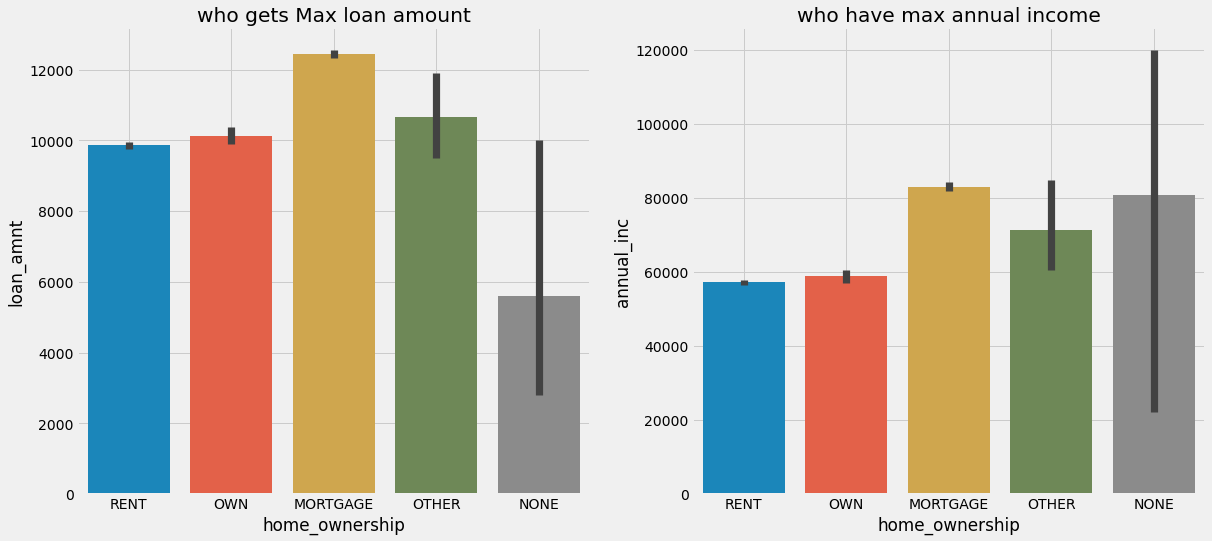

In [119]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.barplot(data=data,x='home_ownership',y='loan_amnt',ax=ax[0],estimator=np.mean)
ax[0].set_title("who gets Max loan amount")
ax[0].grid("on")
sns.barplot(data=data,x='home_ownership',y='annual_inc',ax=ax[1],estimator=np.mean)
ax[1].set_title("who have max annual income")
ax[1].grid("on")
plt.show()

###### <span style="color:blue">Observation </span>

> Mortage get the max loan amnt funded

> Mortage and None have max annual income

### <div style="background-color: green;font-size: 30px;color:white">annual_inc (Continous Variable)</div>

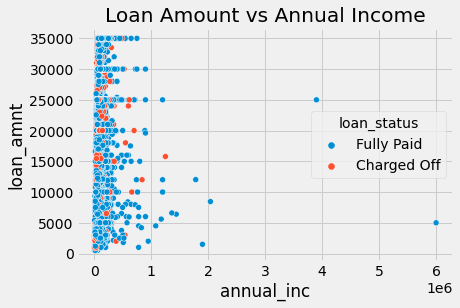

In [120]:
#annual inc vs loan amount
sns.scatterplot(data=data,x='annual_inc',y='loan_amnt',hue='loan_status')
plt.title('Loan Amount vs Annual Income')
plt.show()

###### <span style="color:blue">Observation </span>

>Most people getting loan belongs to range of 0 ~ 2 le6 and there are some outliers, lets analyse it

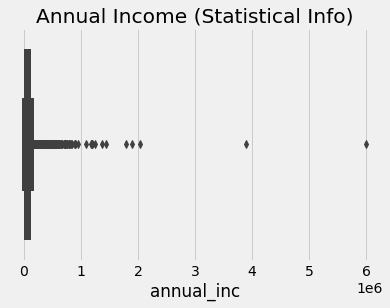

In [121]:
sns.boxplot(data['annual_inc'])
plt.title('Annual Income (Statistical Info)')
plt.show()

In [122]:
#clearly thier is two outlier whose annual_inc is high but taking loan of lower funds and both are fully Paid 
# so it won't contribute to target variable ( charged off ) loans detection

data['annual_inc'].describe()

count    3.851200e+04
mean     6.872552e+04
std      6.421883e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.880000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


### <div style="background-color: coral;font-size: 20px;">Outlier Check</div>

In [123]:
Q1 = data['annual_inc'].quantile(.25)
Q3 = data['annual_inc'].quantile(.75)

#InterQuantile Range
IQR = Q3-Q1
IQR

42000.0

In [124]:
#percentage of rows above upper range
round((len(data[data['annual_inc'] > (Q3+1.5*IQR)]['issue_year'])/df_shape[0])*100,2)

4.55

In [125]:
# we can't drop it as we will loose a good amount of charged off data
# lets try with higher range

In [126]:
round((len(data[data['annual_inc'] > 240000]['issue_year'])/df_shape[0])*100,2)

0.91

##### Outlier Removal

In [127]:
# will remove the outliers greater than 2500000
data = data[data['annual_inc'] <= 2500000]
df_shape= data.shape

In [128]:
#lower range outlier check, no outlier so leave it
len(data[data['annual_inc'] < (Q1-1.5*IQR)]['issue_year'])

0



********SEGMENTED Analysis ( Q1 ( 0-25%) , Q2 (25-50%) , Q3 (50-75%) , Q4 (75-100%) ******************************


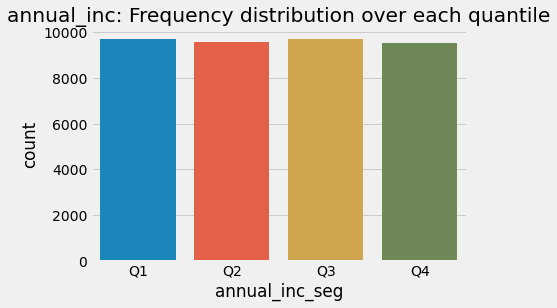

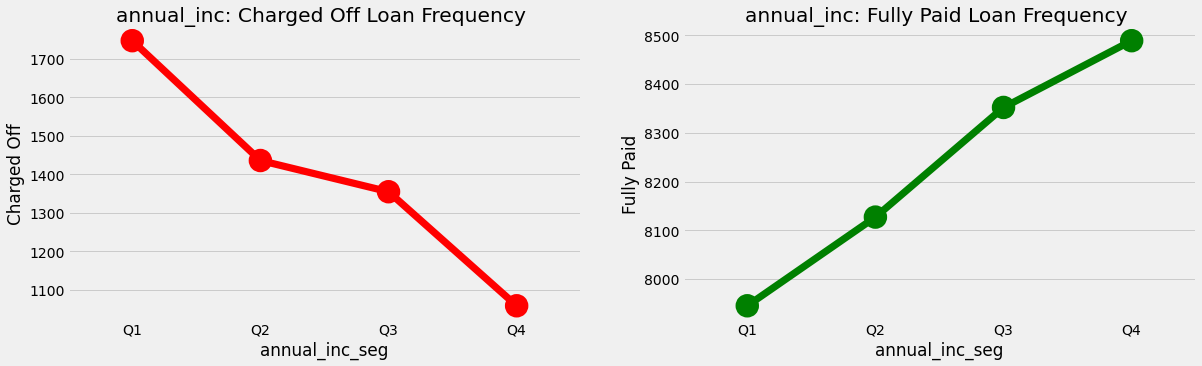

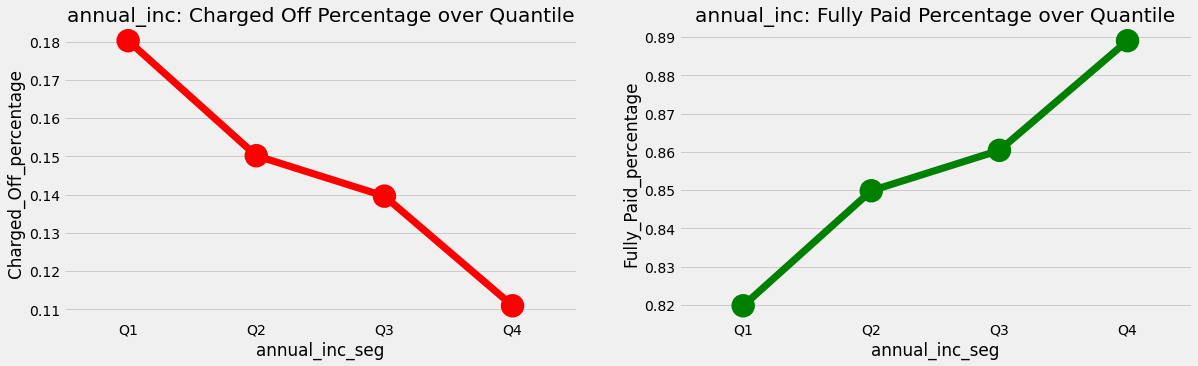

In [129]:
segmentedUnivariateAnalysis(data,'annual_inc')

###### <span style="color:blue">Observation </span>

> As Annual Income Increase chances of Loans getting charged off decreases and fully paid loans increases

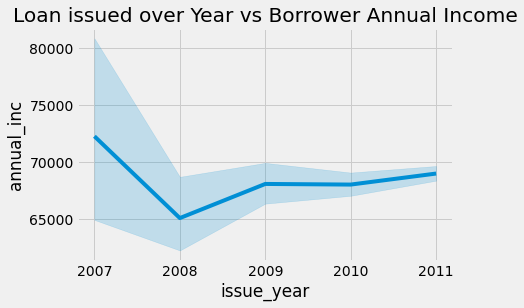

In [130]:
#trivariate Analysis
sns.lineplot(data = data,x='issue_year',y='annual_inc')
plt.title('Loan issued over Year vs Borrower Annual Income')
plt.show()

###### <span style="color:blue">Observation </span>

>Intially loan is given for high income group but now trend is limited to 67500 to 70000

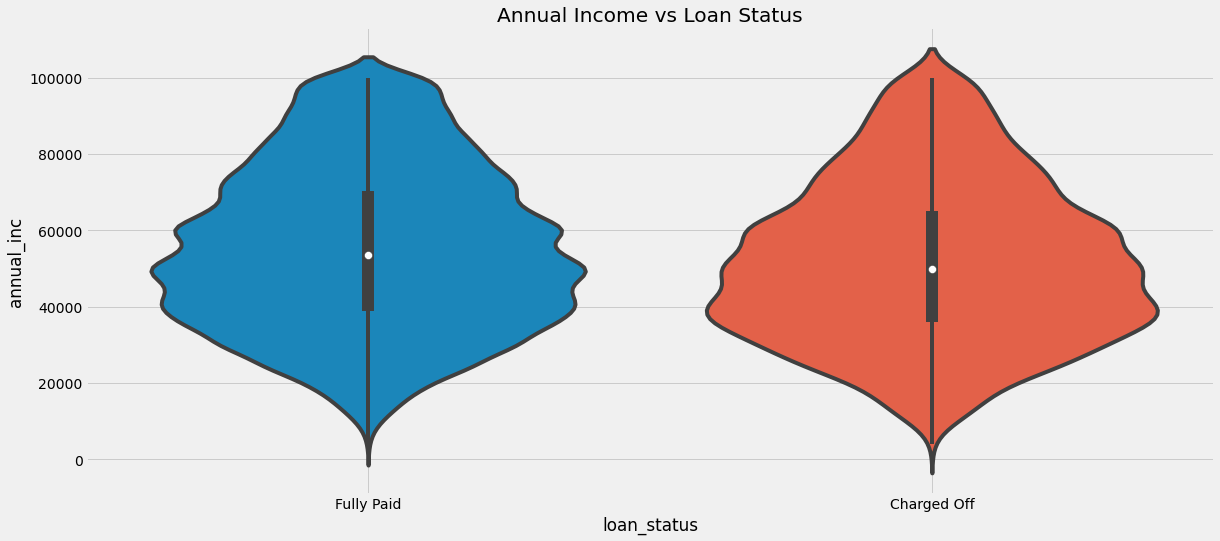

In [131]:
#Bivariavte Analysis
#annual_inc vs loan_status
plt.figure(figsize=(18,8))
sns.violinplot(data=data[data['annual_inc'] <= 100000],x='loan_status',y='annual_inc')
plt.grid("on")
plt.title("Annual Income vs Loan Status")
plt.show()

###### <span style="color:blue">Observation </span>

> 40K to 60K have highest charged off then -->20k to 40 k --> 60 to 80

### <div style="background-color: yellow;font-size: 30px;color:black">verification_status ( Categorical Variable)</div>

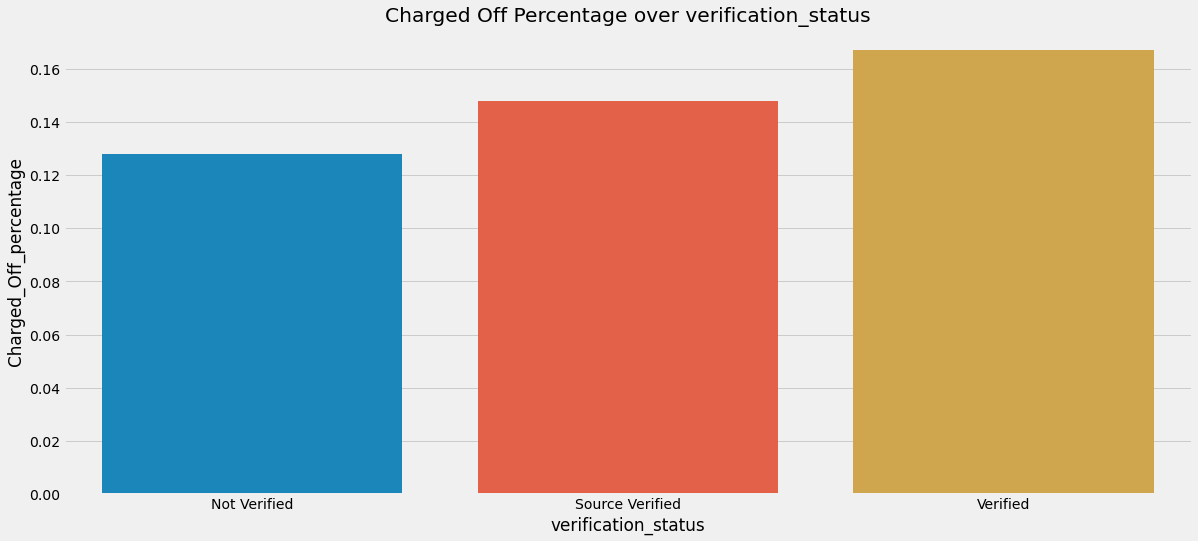

In [132]:
showchargedoffpropation(data,'verification_status')

###### <span style="color:blue">Observation </span>

>Verified loan are more charging off than non verified , so need to recheck the verification process

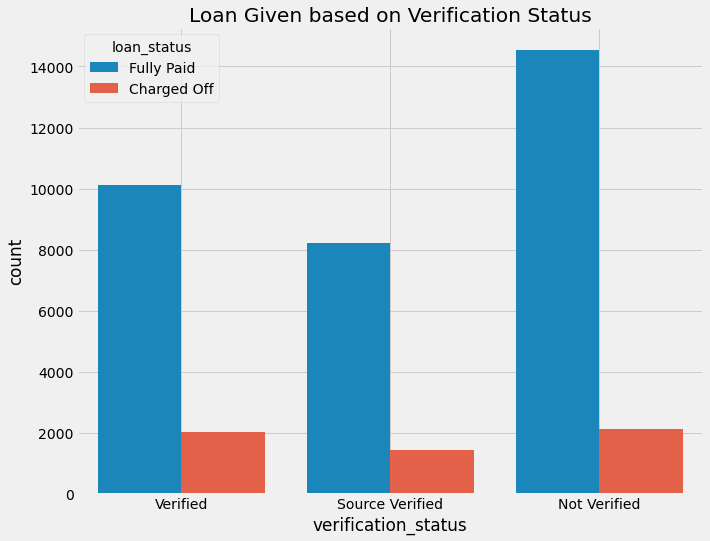

In [133]:
plt.figure(figsize=(10,8))
sns.countplot(data= data , x='verification_status',hue='loan_status')
plt.grid("on")
plt.title('Loan Given based on Verification Status')
plt.show()

###### <span style="color:blue">Observation </span>

> Most loans are given to not verified

### <div style="background-color: green;font-size: 30px;color:white">purpose (Categorical Variable)</div>

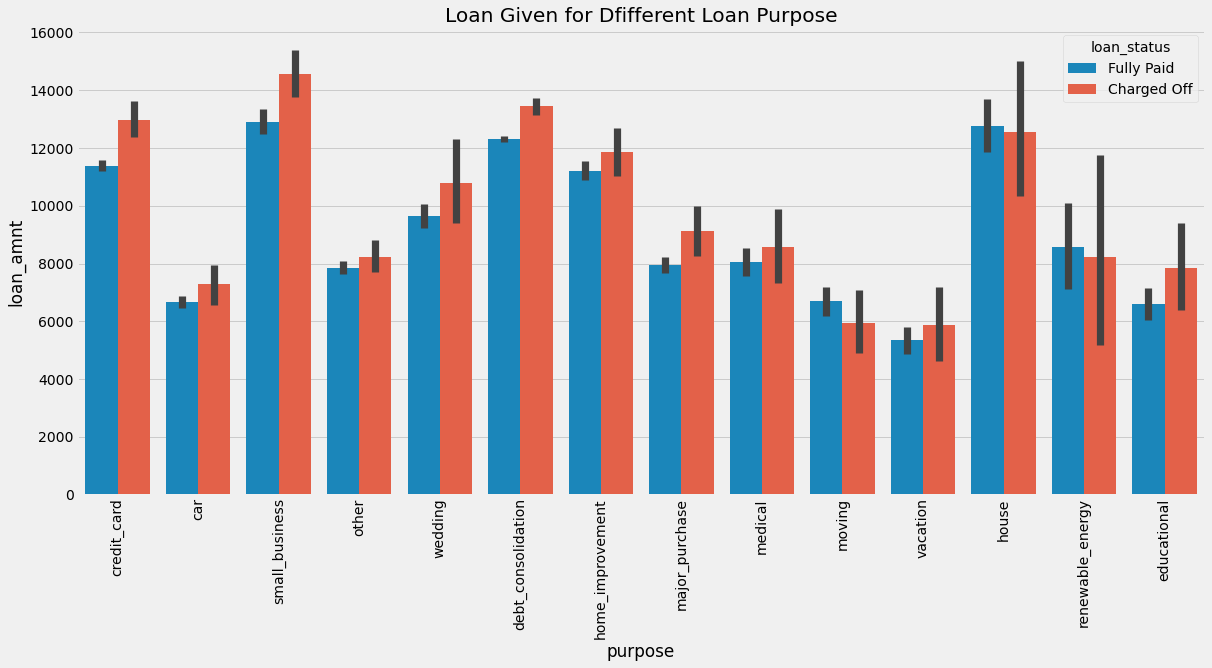

In [134]:
plt.figure(figsize=(18,8))
sns.barplot(data=data,x='purpose',y='loan_amnt',hue='loan_status')
plt.xticks(rotation=90)
plt.title('Loan Given for Dfifferent Loan Purpose')
plt.show()

###### <span style="color:blue">Observation </span>

>For Purpose : small_business, debt_consolidation, credit_card, house are more contributing to the loan amount 

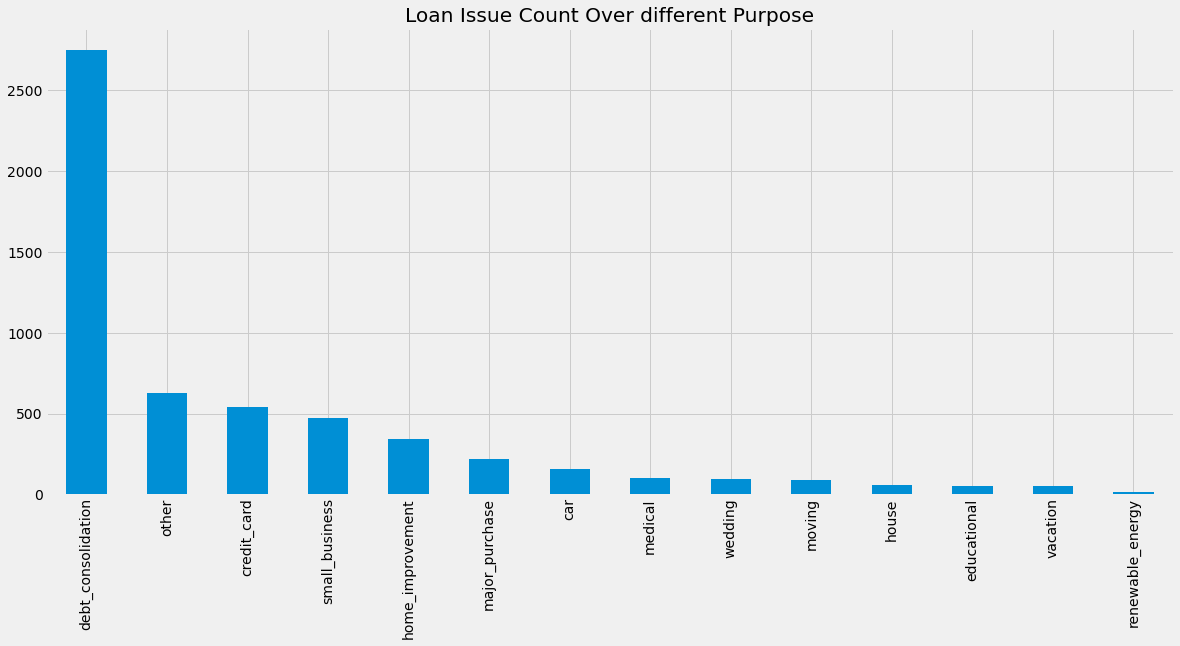

In [135]:
plt.figure(figsize=(18,8))
data[data['loan_status']=='Charged Off']['purpose'].value_counts().plot.bar()
plt.title('Loan Issue Count Over different Purpose')
plt.show()

###### <span style="color:blue">Observation </span>

> For other & major_purpose loan amount is less but contributing more to charged off 

> debt Consolidation,other,credit_card : are most contributing to charged_Off loans

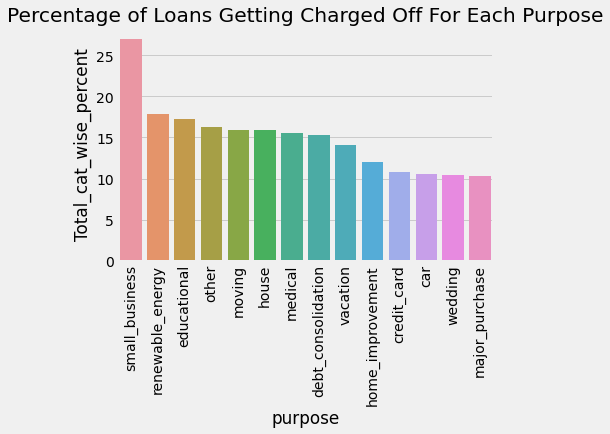

In [136]:
df_purpose = data.groupby(['purpose','loan_status'])['loan_status'].count().unstack()
df_purpose['Total_cat_wise'] = df_purpose['Charged Off'] + df_purpose['Fully Paid']
df_purpose['Total_cat_wise_percent'] = round( (df_purpose['Charged Off'] / df_purpose['Total_cat_wise'])*100,2)
df_purpose= df_purpose.sort_values(by='Total_cat_wise_percent',ascending=False)
sns.barplot(data=df_purpose,y='Total_cat_wise_percent',x=df_purpose.index)
plt.xticks(rotation=90)
plt.title("Percentage of Loans Getting Charged Off For Each Purpose")
plt.show()

###### <span style="color:blue">Observation </span>

> out of total loans given for small business , 25% of small business loans are getting charged off

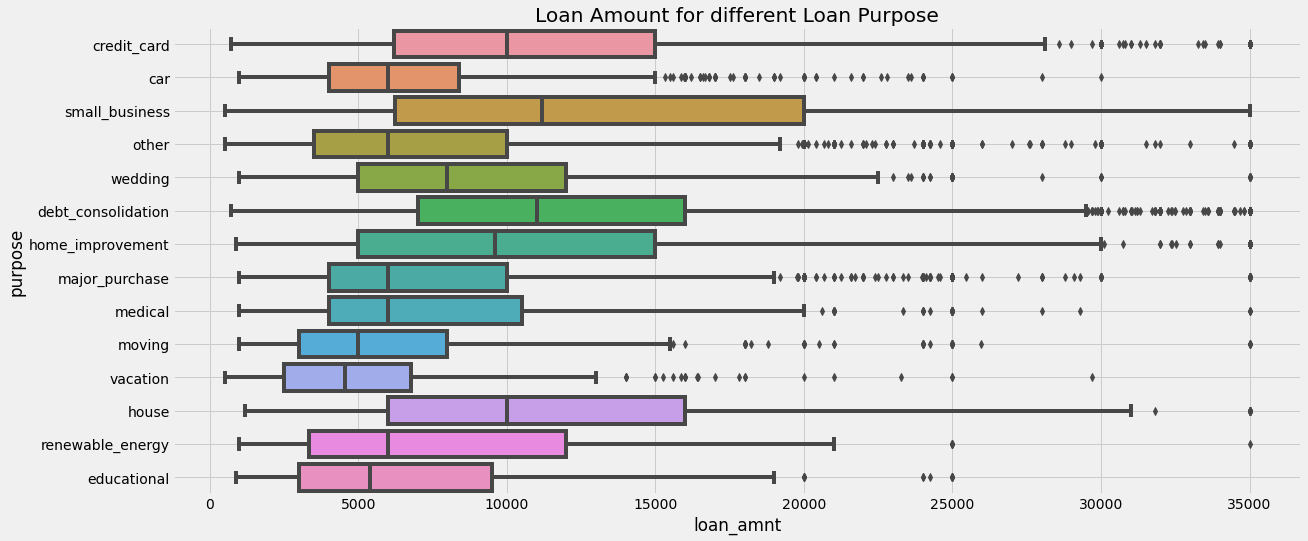

In [137]:
#purpose vs loan Amount
plt.figure(figsize=(18,8))
sns.boxplot(data=data,x='loan_amnt',y='purpose')
plt.title('Loan Amount for different Loan Purpose')
plt.grid("on")
plt.show()

###### <span style="color:blue">Observation </span>

>Higher amount of Loan taken for purpose: Credit card, debt, house..

### <div style="background-color: red;font-size: 30px;color:white">title (dtype: Object)</div>

In [138]:
data['title'].value_counts()

Debt Consolidation                       2081
Debt Consolidation Loan                  1612
Personal Loan                             639
Consolidation                             490
debt consolidation                        477
                                         ... 
Pay off higher interest loans               1
personal debt                               1
Consolidate High Interest Credit Card       1
Roof Replacement/C.C. repay                 1
Need Help Paying for My Wedding             1
Name: title, Length: 19282, dtype: int64

###### <span style="color:blue">Observation </span>

>if we see purpose is divided into sub group and Debt Consolidation, Debt Consolidation Loan, debt consolidation are different 
values, lets drop this

In [139]:
data.drop(['title'],axis=1,inplace=True)

In [140]:
df_shape=data.shape

### <div style="background-color: red;font-size: 30px;color:white">zip_code (dtype : Object))</div>

In [141]:
data['zip_code'].value_counts()

100xx    582
945xx    531
112xx    499
606xx    491
070xx    455
        ... 
734xx      1
414xx      1
162xx      1
408xx      1
169xx      1
Name: zip_code, Length: 822, dtype: int64

###### <span style="color:blue">Observation </span>

>zip_code is encoded columns so we don't have the exact values , so lets drop this Feature

In [142]:
data.drop(['zip_code'],axis=1,inplace=True)

In [143]:
df_shape = data.shape

### <div style="background-color: yellow;font-size: 30px;color:black">addr_state (dtype: Object)</div>

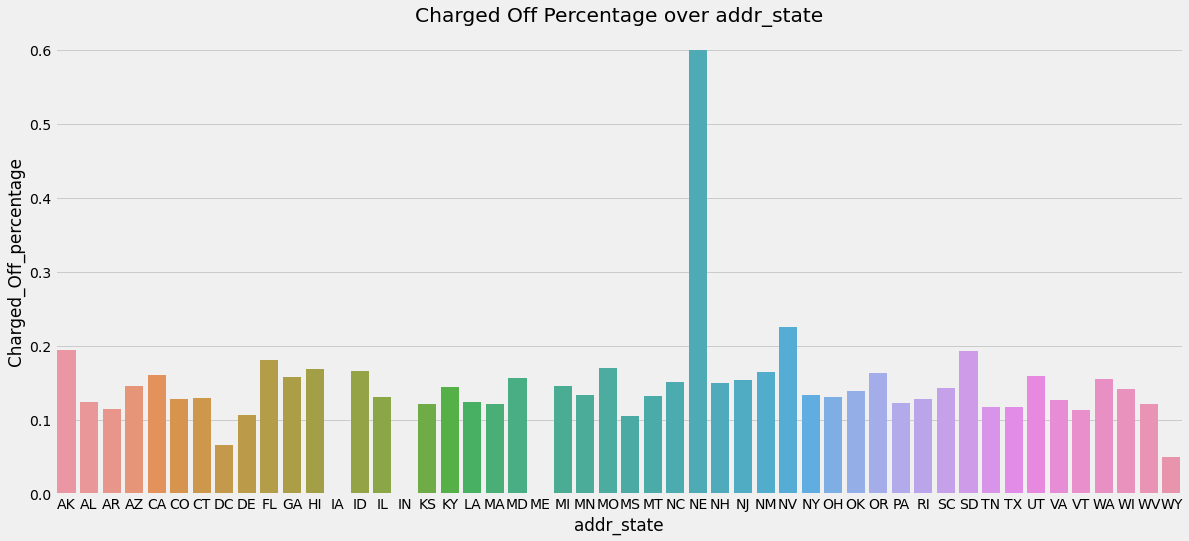

In [144]:
showchargedoffpropation(data,'addr_state')

###### <span style="color:blue">Observation </span>

>NE ,NV states are contributing more to the Charged off Loans

### <div style="background-color: green;font-size: 30px;color:white">dti (Continous Variable)</div>

In [145]:
# dti	A ratio calculated using the borrower’s total monthly debt payments 
#      on the total debt obligations, excluding mortgage and the requested LC loan, 
#      divided by the borrower’s self-reported monthly income.									

data.head(1)

loan_amnt  term  int_rate  installment sub_grade  emp_length  \
0       5000    36     10.65       162.87        B2          10   

  home_ownership  annual_inc verification_status loan_status      purpose  \
0           RENT     24000.0            Verified  Fully Paid  credit_card   

  addr_state    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  \
0         AZ  27.65            0               1         3        0   

   revol_bal  revol_util  total_acc  out_prncp  total_pymnt  total_pymnt_inv  \
0      13648        83.7          9        0.0  5863.155187          5833.84   

   total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  \
0           5000.0         863.16                 0.0         0.0   

   collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  \
0                      0.0       Jan-15           171.62             May-16   

   pub_rec_bankruptcies  cr_line_year  cr_line_month  issue_year  issue_month  \
0                   0.0          1985              1        2011           12   

   Total_Loss  loan_status_code  grade_code  
0 -863.155187                 0           2

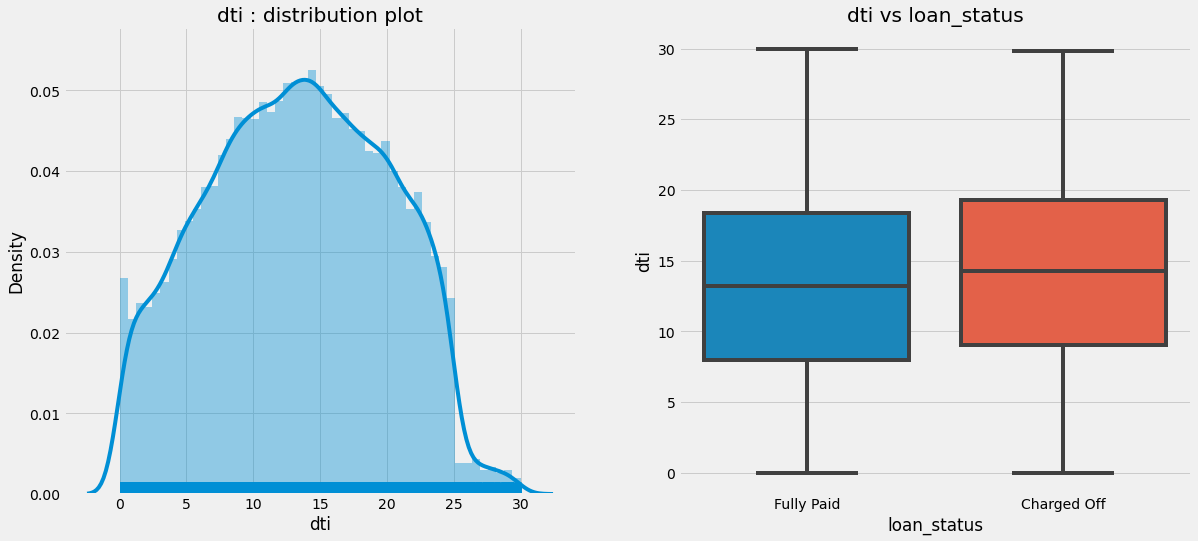

In [146]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.distplot(data["dti"],hist=True,rug=True,kde=True,ax=ax[0])
ax[0].set_title('dti : distribution plot')

sns.boxplot(data=data,y='dti',x='loan_status',ax=ax[1])
ax[1].set_title('dti vs loan_status')
plt.show()

###### <span style="color:blue">Observation </span>

> dti is distributed over a range of 0 to 30 and having max from 10 to 20 ( 25 percentile to 75 percentile)

> as in second graph dti for fully paid and charged off have same infullence,

>slightly higher dti tends to high chance of charged off



********SEGMENTED Analysis ( Q1 ( 0-25%) , Q2 (25-50%) , Q3 (50-75%) , Q4 (75-100%) ******************************


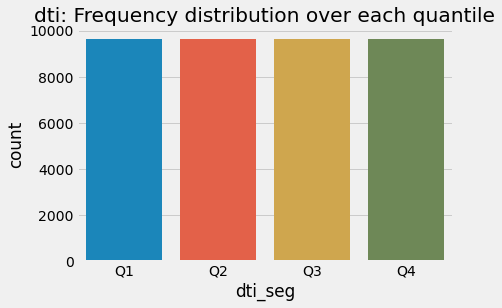

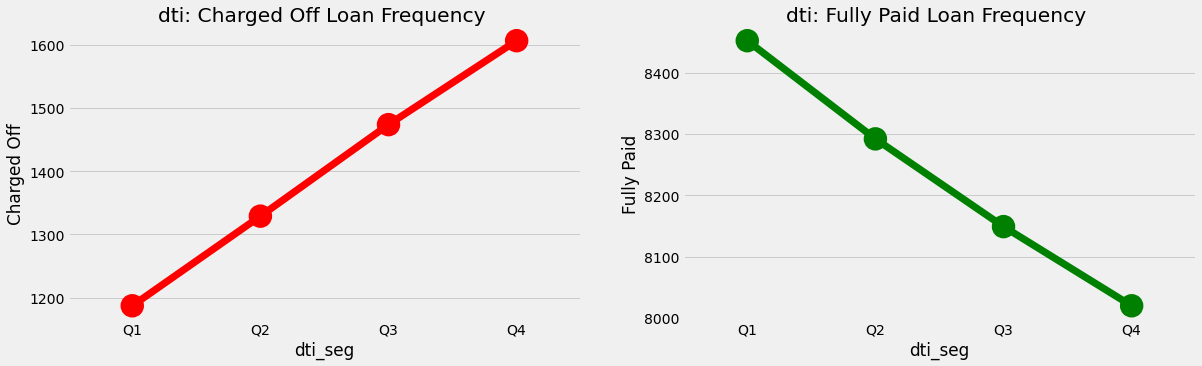

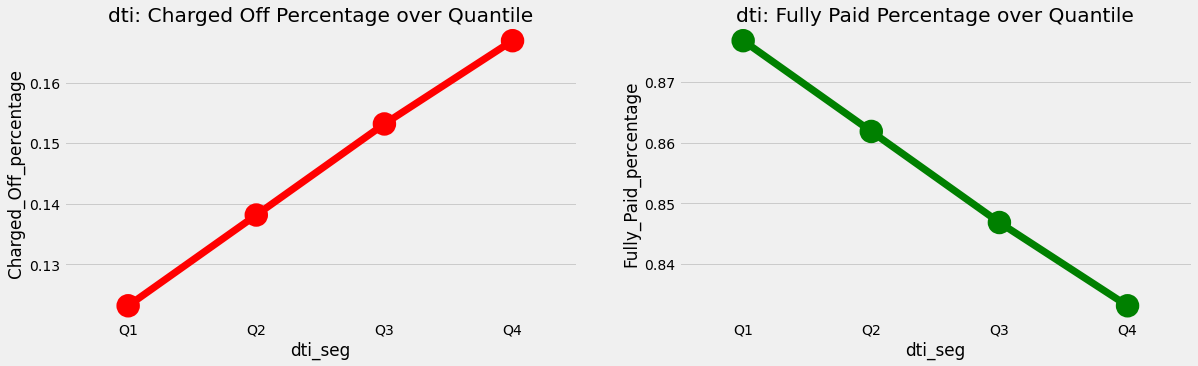

In [147]:
segmentedUnivariateAnalysis(data,'dti')

###### <span style="color:blue">Observation </span>

> Higher dti tends to higher chances of Loans charged off and lower chances of Fully Paid

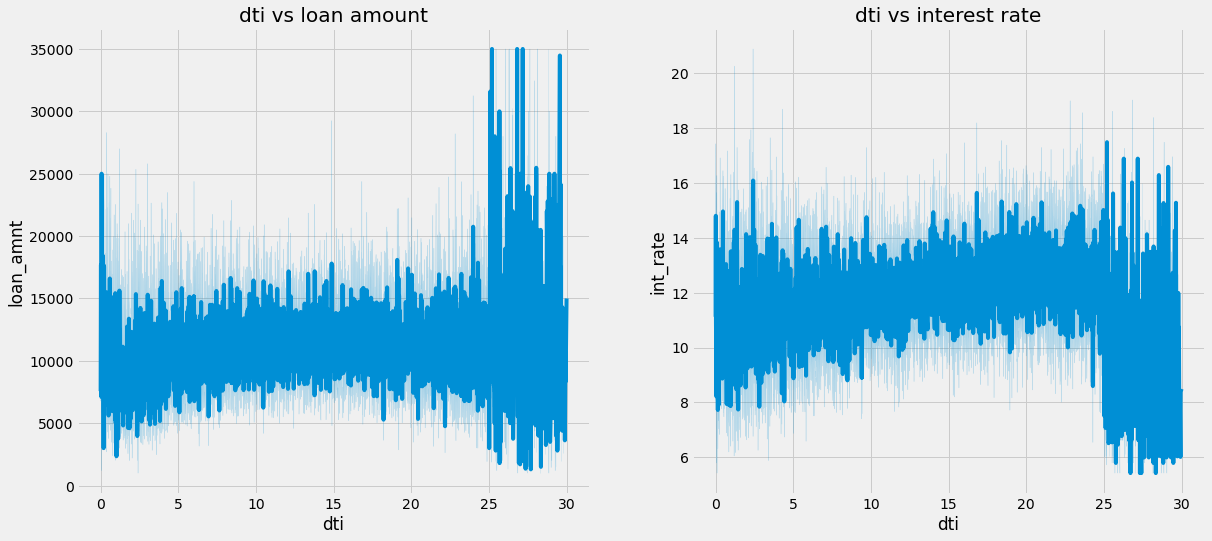

In [148]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.lineplot(data=data,x='dti',y='loan_amnt',ax=ax[0])
ax[0].set_title('dti vs loan amount')

sns.lineplot(data=data,x='dti',y='int_rate',ax=ax[1])
ax[1].set_title('dti vs interest rate')
plt.show()

###### <span style="color:blue">Observation </span>

>higher dti , will get chance of getting loan of higher amount

>higher dti, will get loans at low interest rate like howe laon..

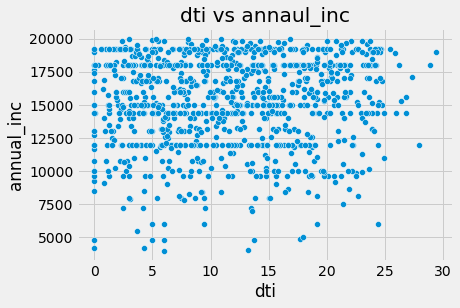

In [149]:
sns.scatterplot(data=data[data['annual_inc']<20000],x='dti',y='annual_inc')
plt.title('dti vs annaul_inc')
plt.show()

###### <span style="color:blue">Observation </span>

>No significance of dti over annual income, spread is uniform across

### <div style="background-color: yellow;font-size: 30px;color:black">issue year & issue month (dtype: datetime)</div>

In [150]:
df_issue = data[data['loan_status']=='Charged Off'].groupby(['issue_year','issue_month'])['loan_status'].count()

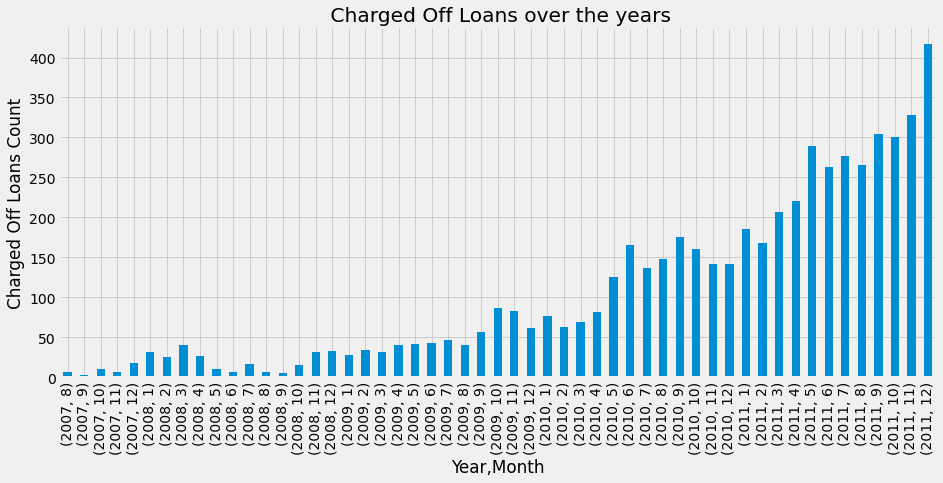

In [151]:
plt.figure(figsize=(14,6))
df_issue.plot(kind='bar')
#sns.barplot(data = df_issue,x=df_issue['issue_year'])
plt.ylabel('Charged Off Loans Count')
plt.xlabel('Year,Month')      
plt.title(" Charged Off Loans over the years")
plt.show()

###### <span style="color:blue">Observation </span>

>Charged off Loans are increasing over each year & month

In [152]:
df_loss = data[data['loan_status']=='Charged Off'].groupby(['issue_year','issue_month'])['Total_Loss'].sum()

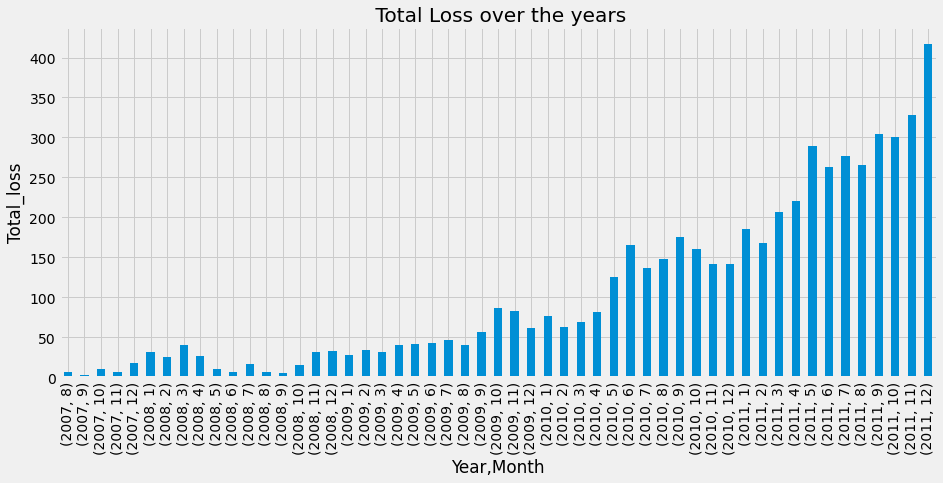

In [153]:
plt.figure(figsize=(14,6))
df_issue.plot(kind='bar')
#sns.barplot(data = df_issue,x=df_issue['issue_year'])
plt.ylabel('Total_loss')
plt.xlabel('Year,Month')      
plt.title(" Total Loss over the years")
plt.show()

###### <span style="color:blue">Observation </span>

>Every year & every month charged off loan count is increasing as well total loss is also increasing

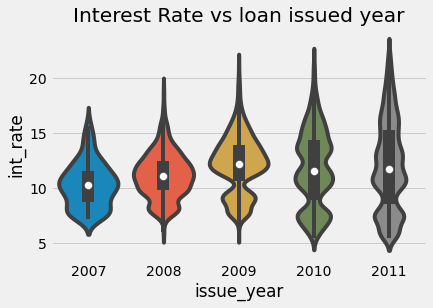

In [154]:
sns.violinplot(data=data,x='issue_year',y='int_rate')
plt.title('Interest Rate vs loan issued year')
plt.show()

###### <span style="color:blue">Observation </span>

>int_rate increasing with issue year

### <div style="background-color: green;font-size: 30px;color:white"> pub_rec_bankruptcies (discrete numerical variable)</div>

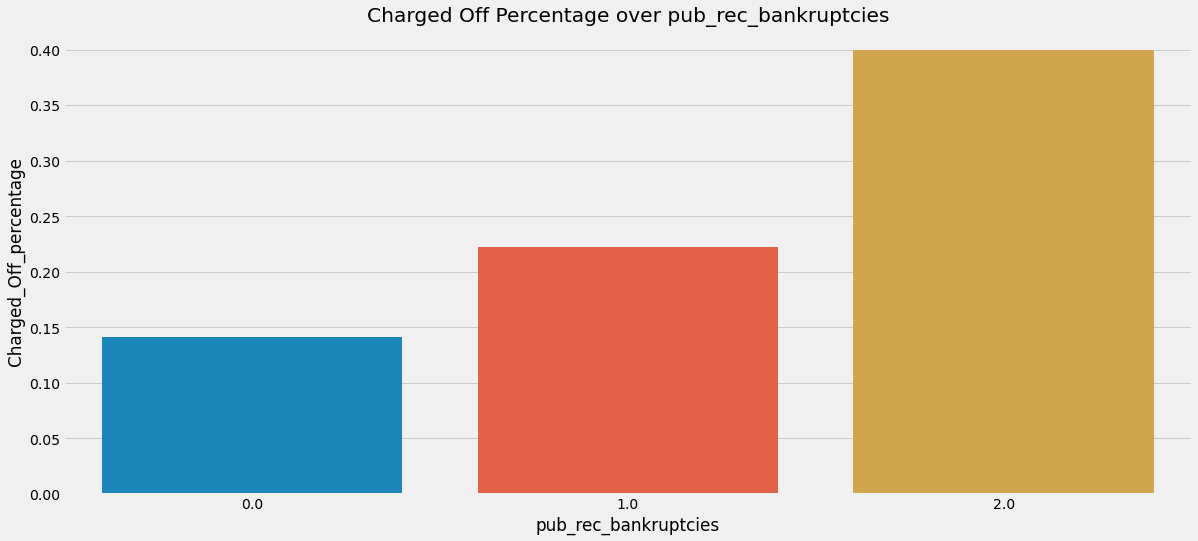

In [155]:
showchargedoffpropation(data,'pub_rec_bankruptcies')

###### <span style="color:blue">Observation </span>

>higher the bankrupties higher the chances off charged off

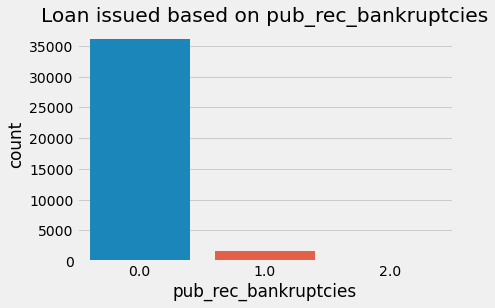

In [156]:
sns.countplot(data['pub_rec_bankruptcies'])
plt.title('Loan issued based on pub_rec_bankruptcies')
plt.show()

###### <span style="color:blue">Observation </span>

> As the bankrupcies increases chances of getting Loans decreases

### <div style="background-color: coral;font-size: 20px;">Imputation of missing values in pub_rec_bankruptcies</div>

In [157]:
#As most loans has bankruptcies as 0 , use this for missing values 
modeval = data['pub_rec_bankruptcies'].mode()
modeval[0]

0.0

In [158]:
data['pub_rec_bankruptcies']= data['pub_rec_bankruptcies'].fillna(modeval[0])

### <div style="background-color: green;font-size: 30px;color:white"> pub_rec (discrete numerical variable)</div>

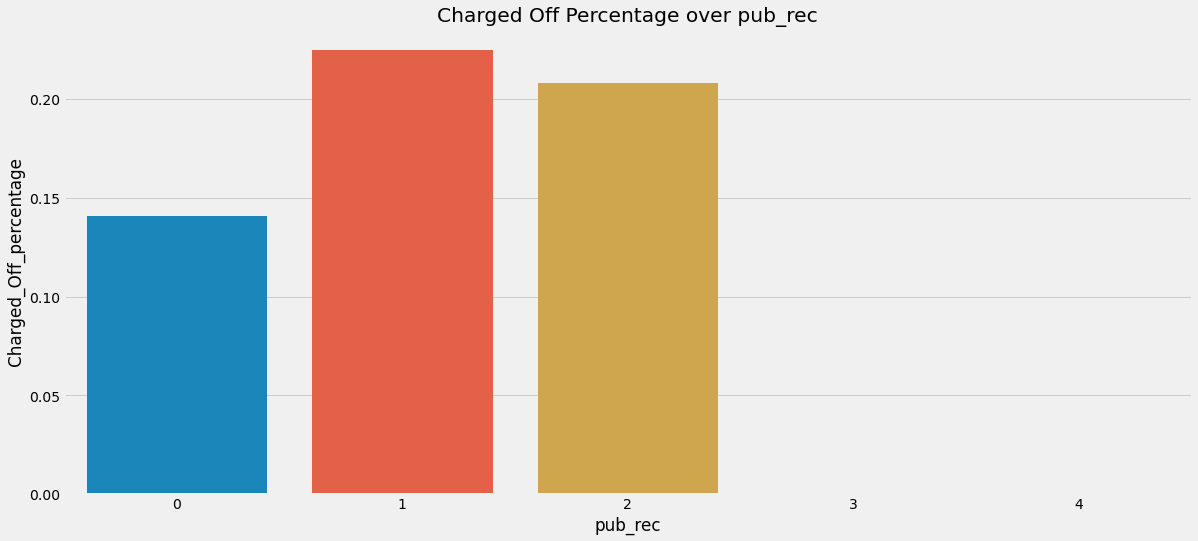

In [159]:
showchargedoffpropation(data,'pub_rec')

###### <span style="color:blue">Observation </span>

>higher the pub_rec higher the chances of loan default

### <div style="background-color: yellow;font-size: 30px;color:black"> recoveries (continous variable) ( Business Driven Feature Extraction)</div>

In [160]:
data[data['recoveries']>0].loan_status.value_counts()

Charged Off    4192
Name: loan_status, dtype: int64

In [161]:
#where every recovery is done its charged off loans

In [162]:
data['recovery_prct'] = (data['recoveries'] / data['loan_amnt'])*100

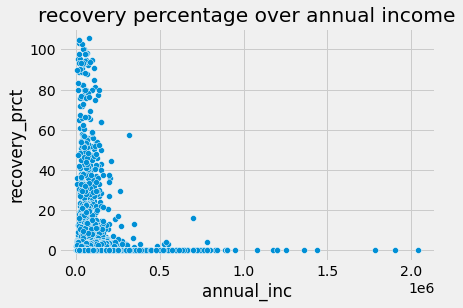

In [163]:
sns.scatterplot(data=data,x='annual_inc',y='recovery_prct')
plt.title('recovery percentage over annual income')
plt.show()

###### <span style="color:blue">Observation </span>

> Most Recovery Done From Lower Income Range Borrower

In [164]:
#less view for lower range
Q3_annual_inc = data['annual_inc'].quantile(0.75)
Q3_annual_inc

82000.0

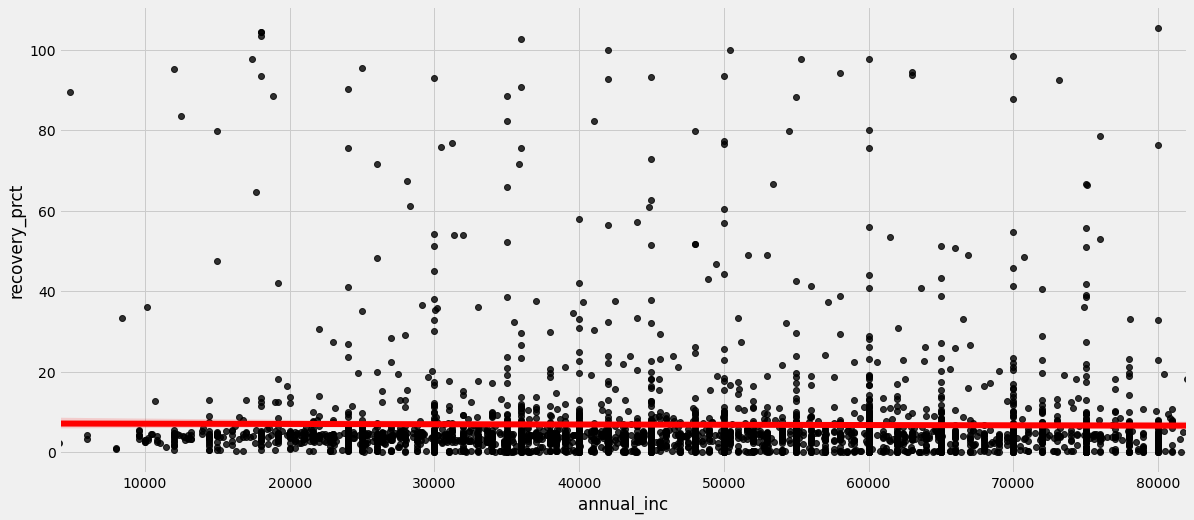

In [165]:
plt.figure(figsize=(18,8))
sns.regplot(data=data[(data['annual_inc']<Q3_annual_inc) & (data['recovery_prct']>0)],x='annual_inc',y='recovery_prct',scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

###### <span style="color:blue">Observation </span>

>very less recovery is done... more annaul inc so more recovery, but line curve is almost straight

### <div style="background-color: yellow;font-size: 30px;color:black"> delinq_2yrs (discreate numerical Variable)</div>

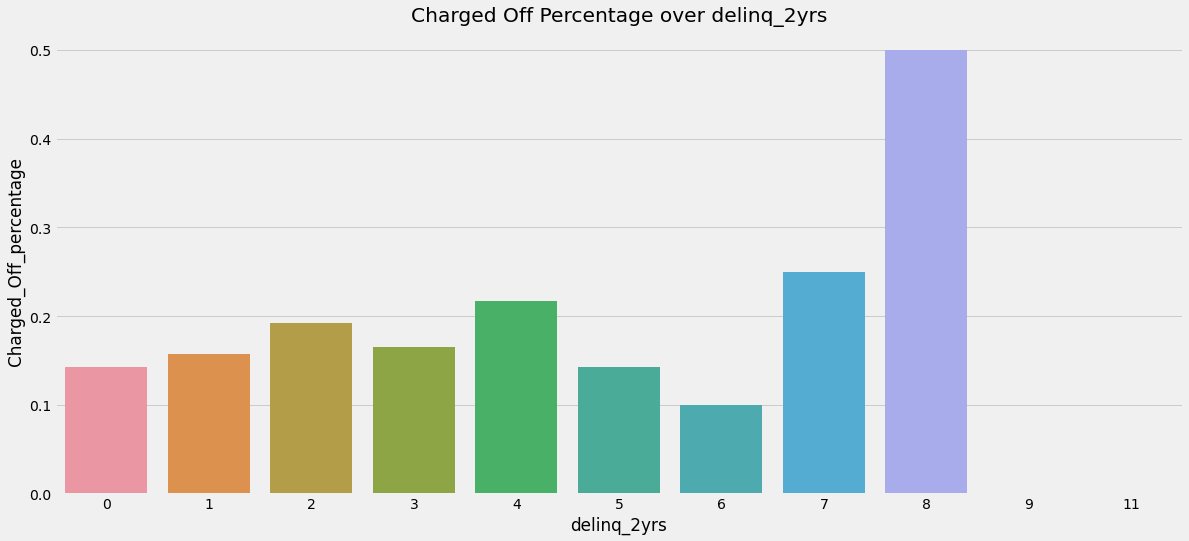

In [166]:
showchargedoffpropation(data,'delinq_2yrs')

###### <span style="color:blue">Observation </span>

>seems higher the delinq_2_yrs higher is the chance( 8 > 7 > 5> 6)

### <div style="background-color: green;font-size: 30px;color:white"> inq_last_6mths ( discreate numerical variable)</div>

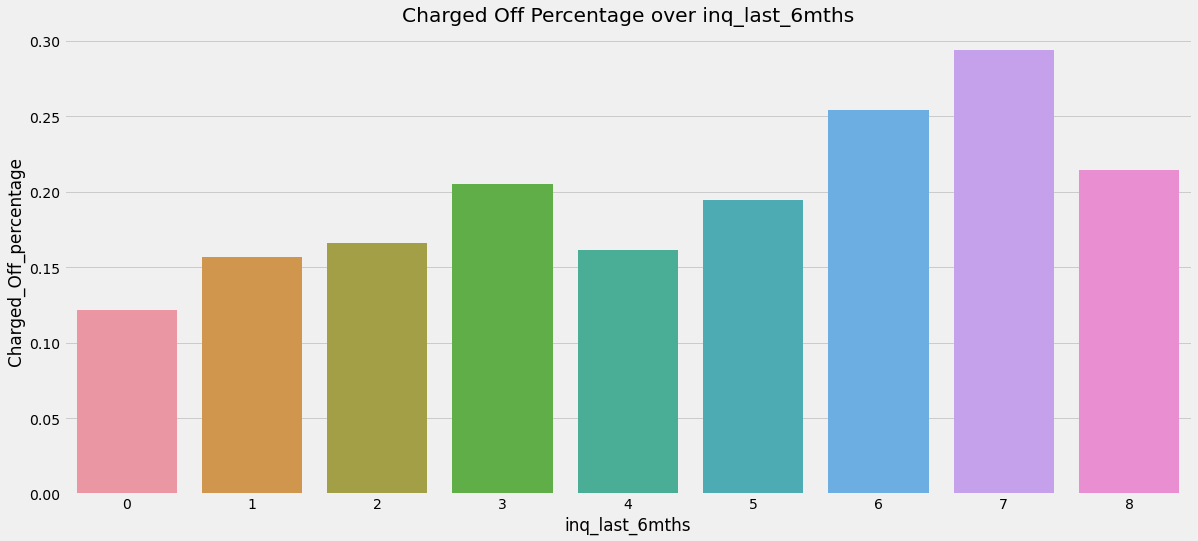

In [167]:
showchargedoffpropation(data,'inq_last_6mths')

###### <span style="color:blue">Observation </span>

>it revelas the credit score : the large the inquiry made , lower is the cibil score and 
same here larger the inquiry made , greater is the chance of charged off loans

### <div style="background-color: yellow;font-size: 30px;color:black">open_acc (discreate numerical variable)</div>

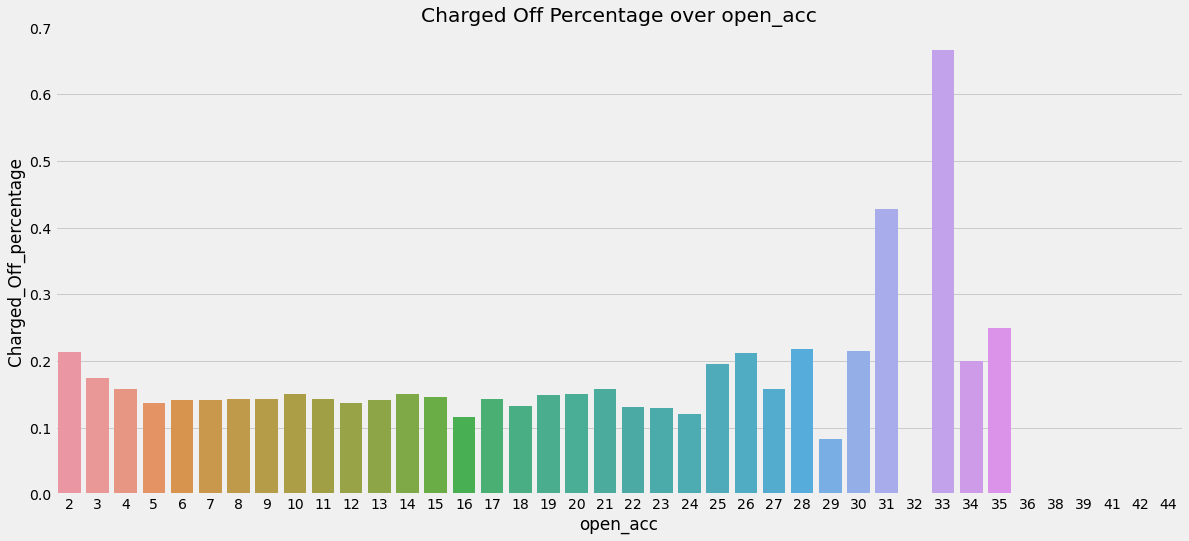

In [168]:
showchargedoffpropation(data,'open_acc')

###### <span style="color:blue">Observation </span>

>No clear distinction but at the end , means for extremly large no of open acc, its contributing more to the charged off

### <div style="background-color: red;font-size: 30px;color:white">revol_bal (discreate numerical variable)</div>

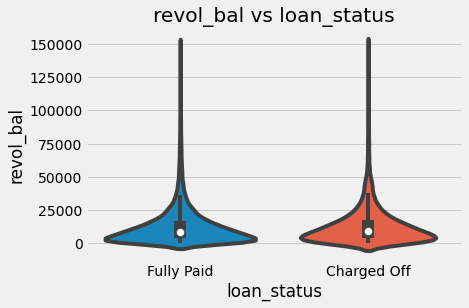

In [169]:
#For All data
sns.violinplot(data=data,y='revol_bal',x='loan_status')
plt.title('revol_bal vs loan_status')
plt.show()

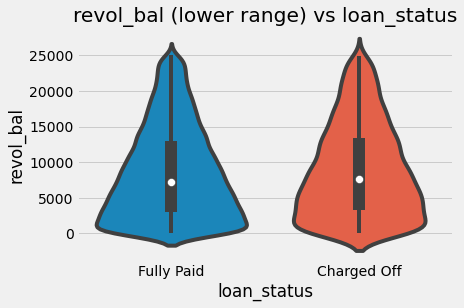

In [170]:
#lets lower the range of revol_bal to look dipper into it
sns.violinplot(data=data[data['revol_bal']<25000],y='revol_bal',x='loan_status')
plt.title('revol_bal (lower range) vs loan_status')
plt.show()

###### <span style="color:blue">Observation </span>

>Both the above plot seems almost same , so there is no significance of revol_bal on charged off loans

### <div style="background-color: yellow;font-size: 30px;color:black">revol_util (Continous Variable)</div>

In [171]:
#missing value count
data['revol_util'].isnull().sum()

50



********SEGMENTED Analysis ( Q1 ( 0-25%) , Q2 (25-50%) , Q3 (50-75%) , Q4 (75-100%) ******************************


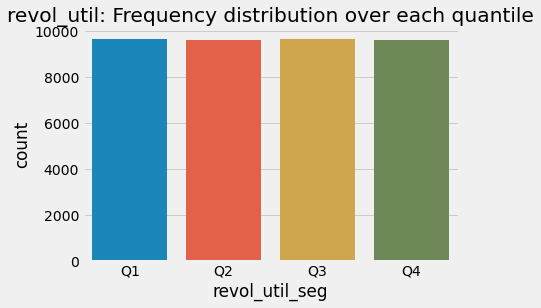

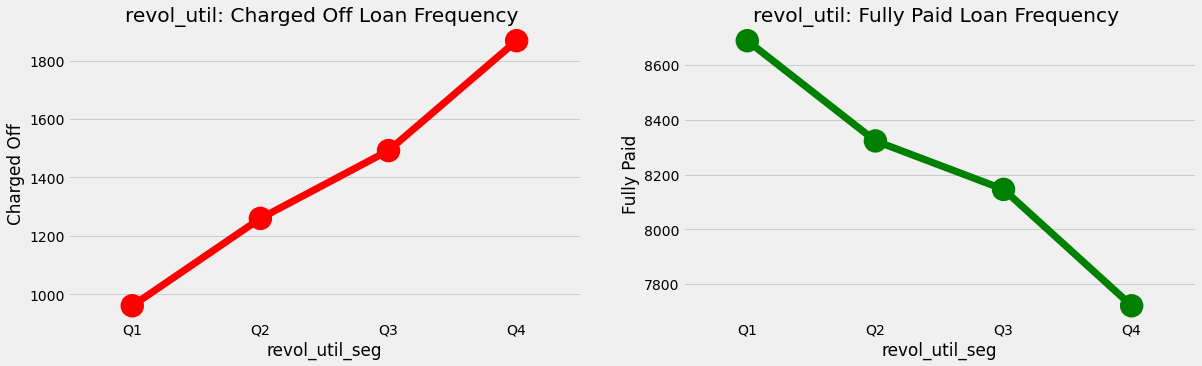

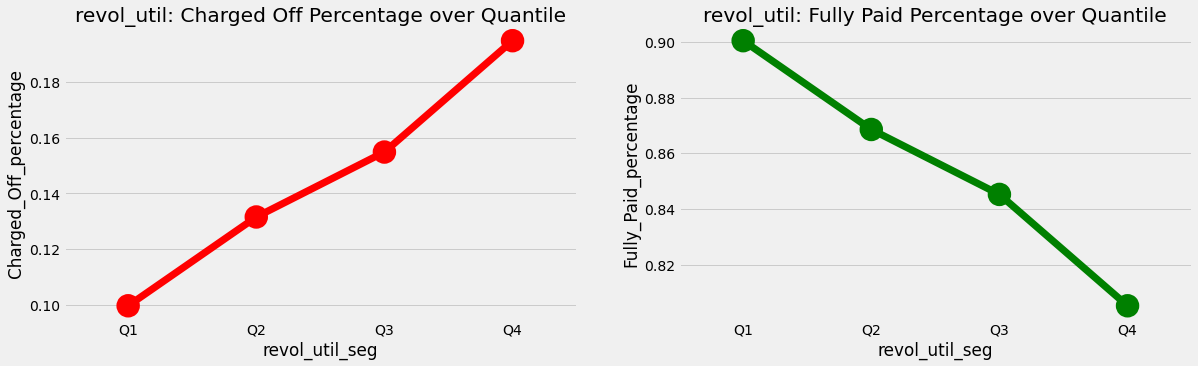

In [172]:
segmentedUnivariateAnalysis(data,'revol_util')

###### <span style="color:blue">Observation </span>

> As revol util increases chances of loans getting charged off get increased

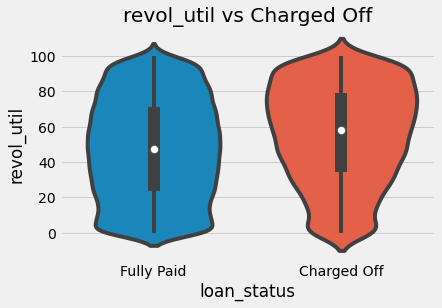

In [173]:
sns.violinplot(data=data,y='revol_util',x='loan_status')
plt.title('revol_util vs Charged Off')
plt.show()

###### <span style="color:blue">Observation </span>

>higher revol util tens to have high chances of Charged off

Text(0.5, 1.0, 'revol_util (Statistical info (based on loan status))')

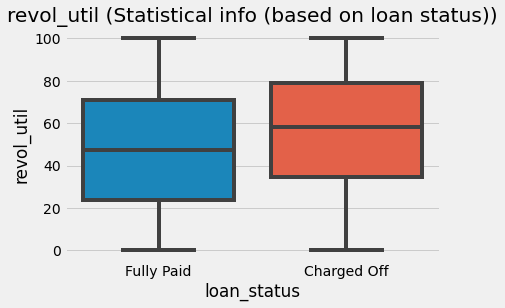

In [174]:
sns.boxplot(data=data,y='revol_util',x='loan_status')
plt.title('revol_util (Statistical info (based on loan status))')

###### <span style="color:blue">Observation </span>

>revol_util at higher range ( > 40) are more contributing to charged off loans

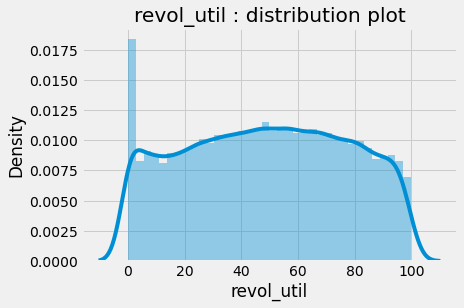

In [175]:
sns.distplot(data['revol_util'])
plt.title('revol_util : distribution plot')
plt.show()

###### <span style="color:blue">Observation </span>

>There is a uniform distribution of revol_util

In [176]:
data[data['revol_util'].isnull()]['loan_status'].value_counts()

Fully Paid     34
Charged Off    16
Name: loan_status, dtype: int64

### <div style="background-color: coral;font-size: 20px;">Imputation of missing values</div>

In [177]:
# from distibution plot most values lies on 0 so lets impute the value 0 for missing columns values

data['revol_util'] = data['revol_util'].fillna(0)

### <div style="background-color: yellow;font-size: 30px;color:black">total_acc (discreate numerical Variable)</div>



********SEGMENTED Analysis ( Q1 ( 0-25%) , Q2 (25-50%) , Q3 (50-75%) , Q4 (75-100%) ******************************


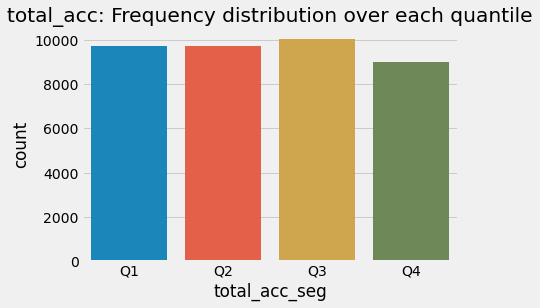

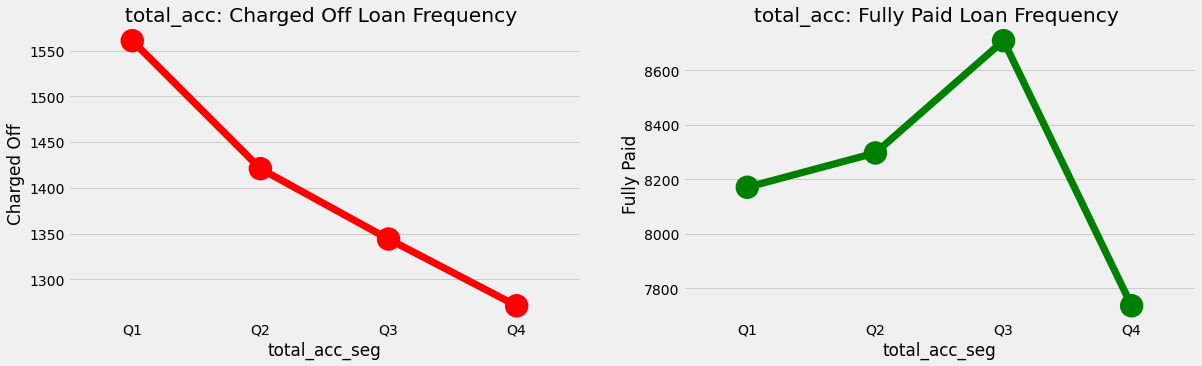

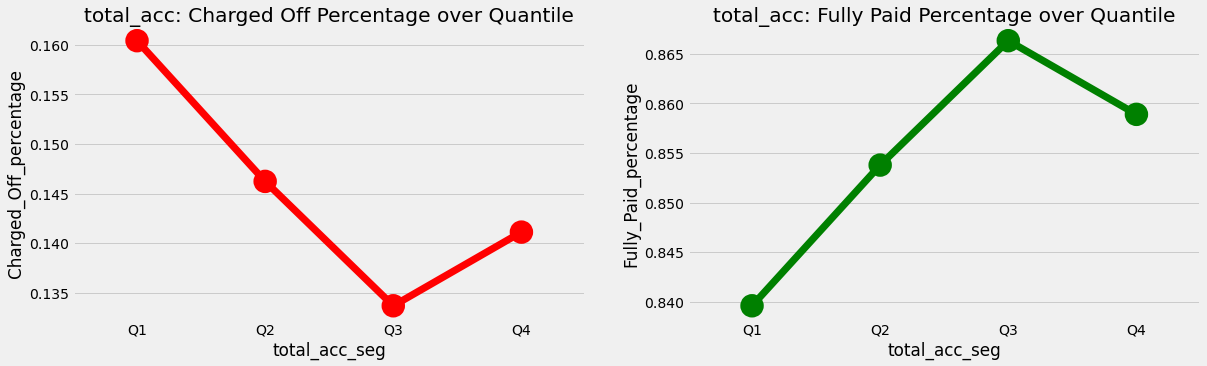

In [178]:
segmentedUnivariateAnalysis(data,'total_acc')

###### <span style="color:blue">Observation </span>

> As no of total acc increase chances of loans getting charged off decreases and fully paid get increases

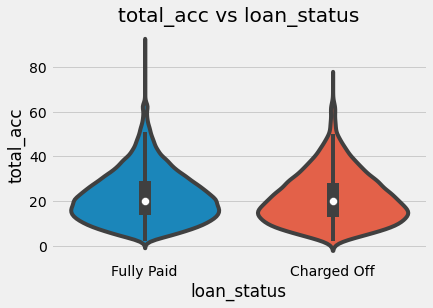

In [179]:
sns.violinplot(data=data, y='total_acc',x='loan_status')
plt.title('total_acc vs loan_status')
plt.show()

###### <span style="color:blue">Observation </span>

>both plot look similar, so not a significant impact of the Total Account on Loan Status

### <div style="background-color: coral;font-size: 30px;">Multivariate Analysis</div>

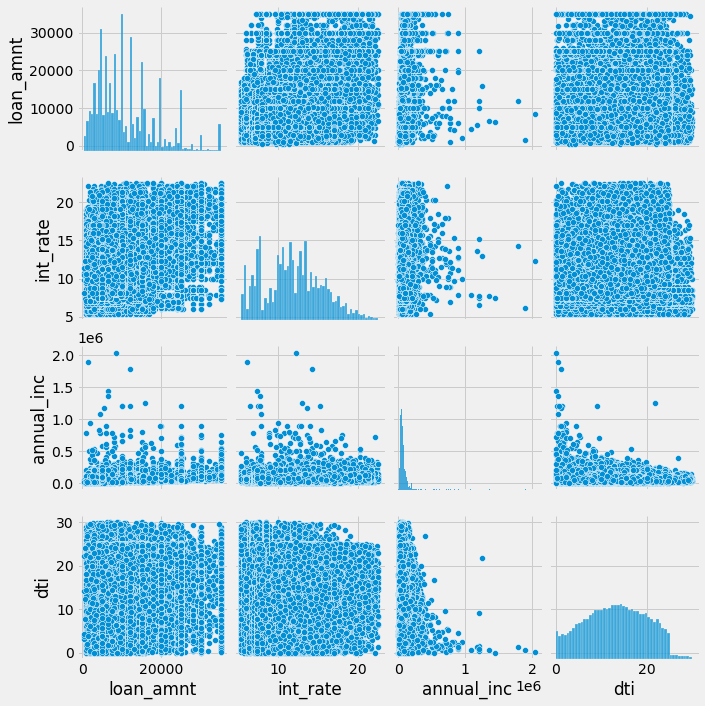

In [180]:
df_multiplot= data.loc[:,['loan_amnt','int_rate','annual_inc','dti']]
sns.pairplot(df_multiplot)

#delete temp dataframe
del df_multiplot

###### <span style="color:blue">Observation </span>

> as loan amount increase int_rate and dti is uniformly spread out

> Most Borrower are from lower income group

### <div style="background-color: coral;font-size: 30px;">Will drop unused Features</div>

##### Feature specific to particular loan row column, these values can't be used when customer applies for loan and decide that is it going to be charged off or not

In [181]:
## will drop all these rows as these values are not there when borrower applies for loan so it wont help 
## in determining that  loan is going to be charged off or not.

data.drop(['out_prncp','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1,inplace=True)

In [182]:
#sub_grade ( its perform same as grade so we can drop it and use grade for analysis & modeling) 
# & recovery_prct we will drop ( as its just used for above graph interpetation)

data.drop(['sub_grade','recovery_prct'],axis=1,inplace=True)

In [183]:
#will drop loan_status as we have loan_status_code
data.drop(['loan_status','cr_line_year','cr_line_month'],axis=1,inplace=True)

### <div style="background-color: coral;font-size: 30px;">Recheck Columns ( Missing Values & dtypes)</div>

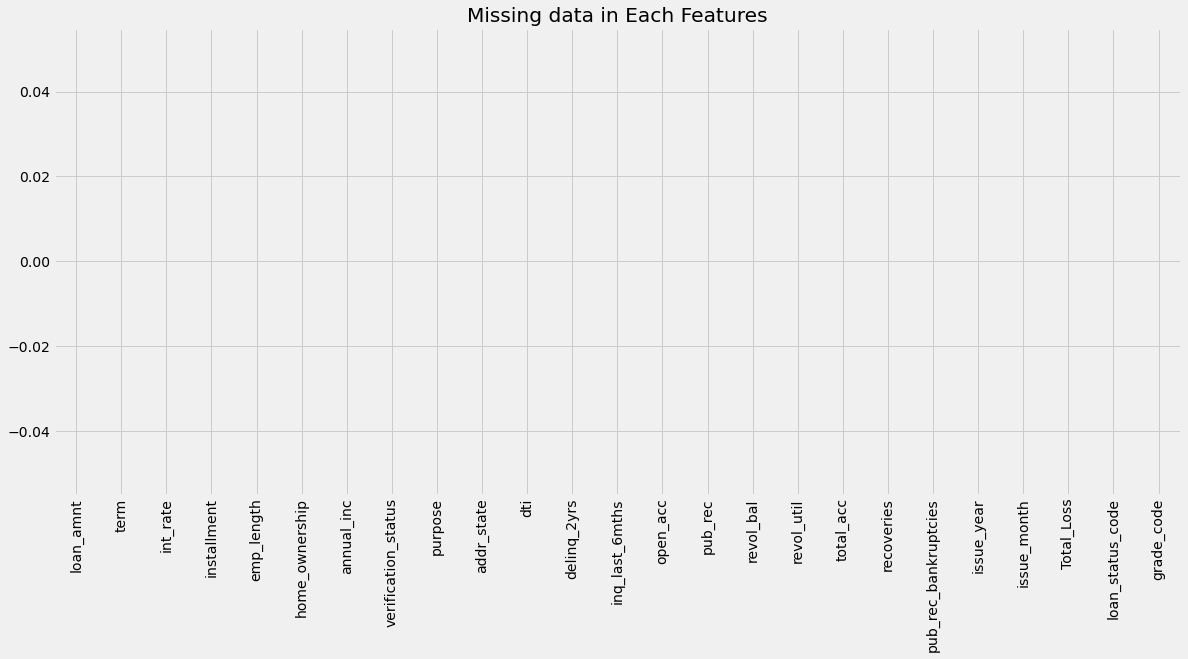

In [184]:
plotMissingColumns(data)

###### <span style="color:blue">Observation </span>

> No Features Left with Missing values, now good for ML Models

In [185]:
#final columns after EDA
data.dtypes

loan_amnt                 int64
term                      int64
int_rate                float64
installment             float64
emp_length                int32
home_ownership           object
annual_inc              float64
verification_status      object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
recoveries              float64
pub_rec_bankruptcies    float64
issue_year                int64
issue_month               int64
Total_Loss              float64
loan_status_code          int64
grade_code                int64
dtype: object

###### <span style="color:blue">Observation </span>

> Most Feature are now have dtype as int / float, the object dtype ( verification_status, purpose, addr_state) need to be encoded.

# ****************** END OF EDA ***************************